In [ ]:
# Robert Cocker
# Dr. Farbin 
# DATA 3402
# Lab 7
# 3/28/2024

# Lab 7- Data Analysis

Exercises 1-4 are to be completed by Match 29th. The remaider of the lab is due April 5th. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [1]:
# !curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  5674k      0 --:--:--  0:02:38 --:--:-- 4791k   0 --:--:--  0:00:36 --:--:-- 5800k  0 --:--:--  0:00:47 --:--:-- 5807k:00:49 --:--:-- 5770kk      0 --:--:--  0:01:09 --:--:-- 5829k    0 --:--:--  0:01:27 --:--:-- 5827k5792k      0 --:--:--  0:01:43 --:--:-- 5801k--:--  0:01:59 --:--:-- 5811k5793k      0 --:--:--  0:02:11 --:--:-- 5781k02:17 --:--:-- 5794k:26 --:--:-- 4807k


In [2]:
# !wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz

--2024-03-22 11:31:46--  http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘SUSY.csv.gz’

SUSY.csv.gz             [    <=>             ] 879.65M  4.85MB/s    in 7m 17s  

2024-03-22 11:39:04 (2.01 MB/s) - ‘SUSY.csv.gz’ saved [922377711]



In [3]:
# !gunzip SUSY.csv.gz

In [2]:
ls -lh

total 2.3G
-rw-r--r-- 1 rcwsl rcwsl 3.1M Apr  6 02:19 Lab.7.ipynb
-rw-r--r-- 1 rcwsl rcwsl 6.2M Mar 22 11:26 Lab.7.pdf
-rw-r--r-- 1 rcwsl rcwsl 2.3G Mar 22 11:39 SUSY.csv


The data is provided as a comma separated file.

In [3]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [4]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [5]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [6]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [7]:
FeatureNames

['S_R',
 'MT2',
 'cos_theta_r1',
 'R',
 'M_R',
 'MET_rel',
 'dPhi_r_b',
 'M_Delta_R',
 'M_TR_2',
 'axial_MET']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/tmp/ipykernel_67/2225940201.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Now we can read the data into a pandas dataframe:

In [9]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [10]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [11]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


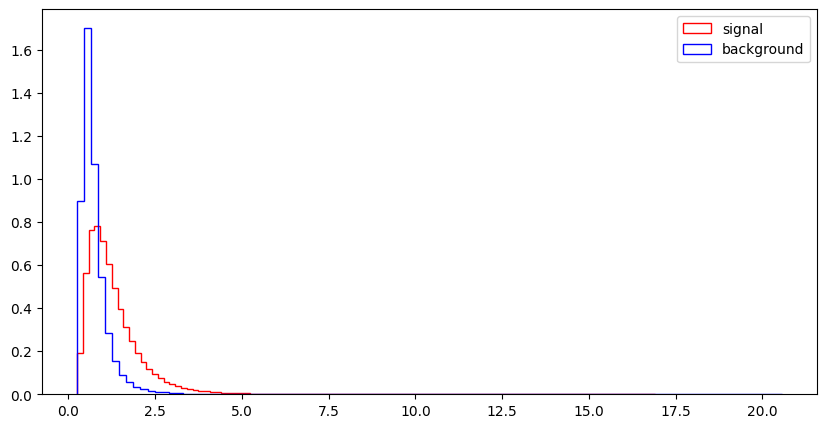

l_1_eta


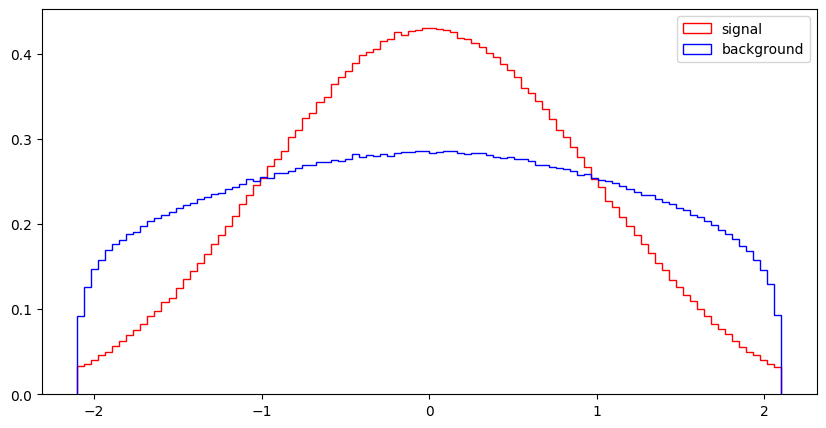

l_1_phi


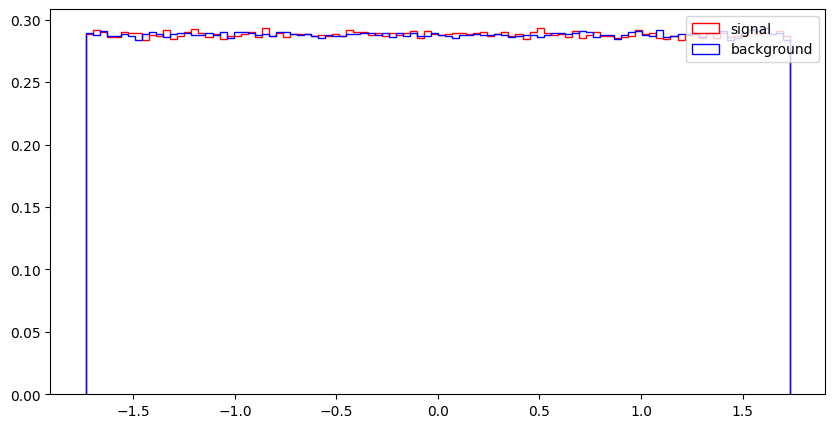

l_2_pT


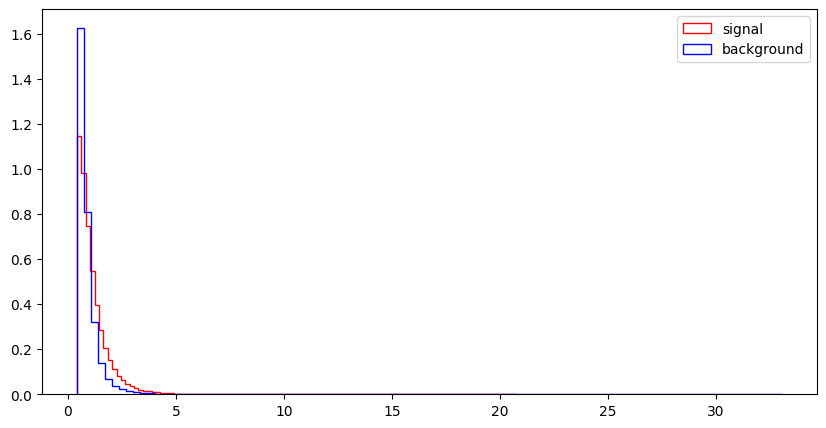

l_2_eta


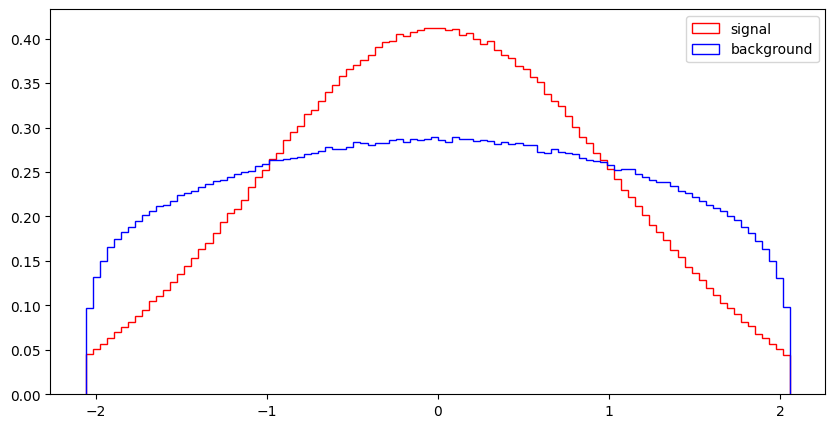

l_2_phi


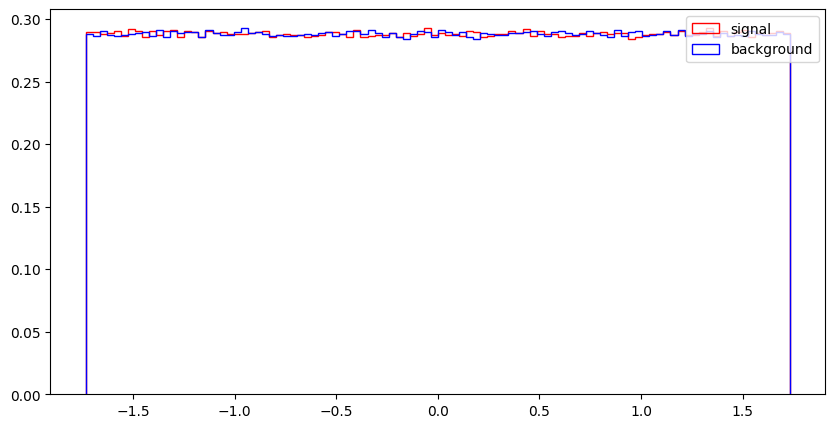

MET


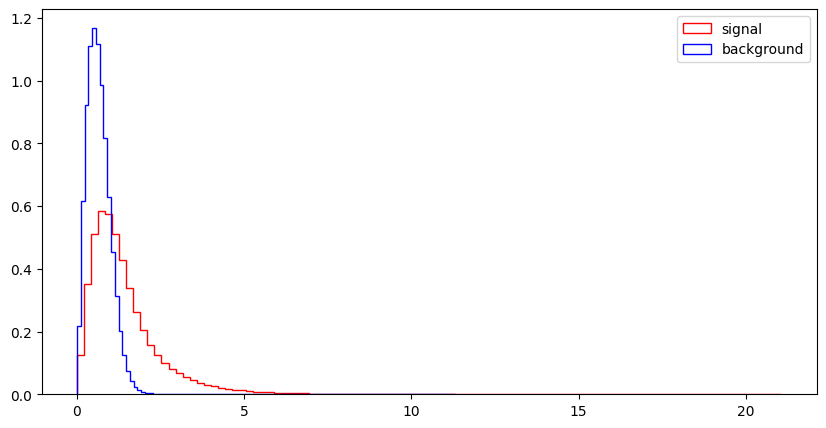

MET_phi


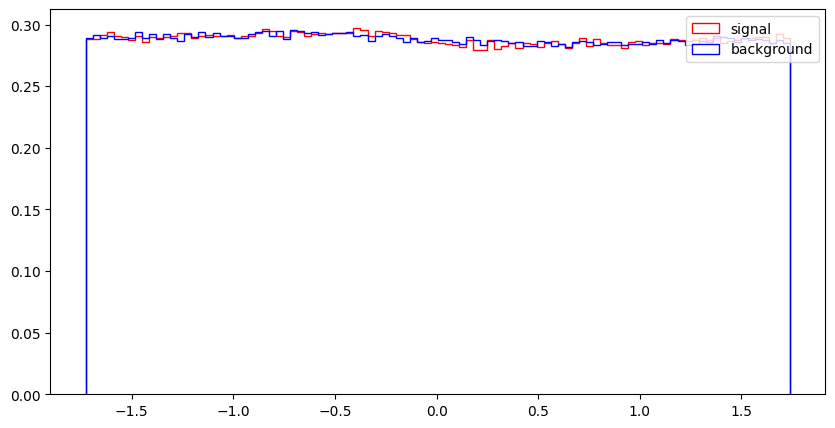

MET_rel


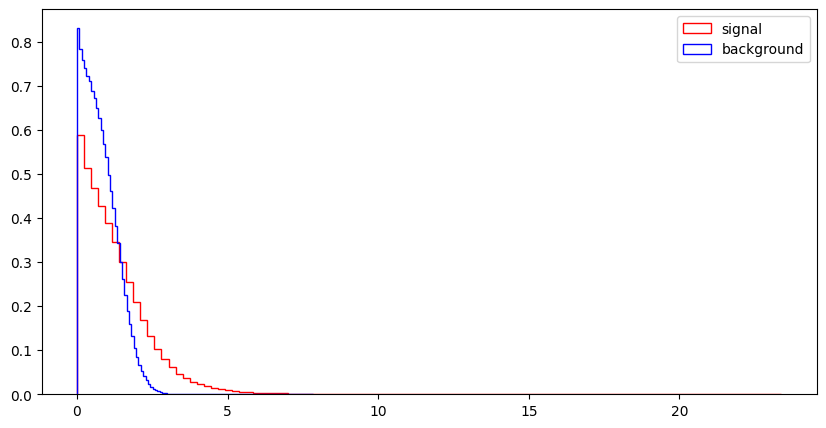

axial_MET


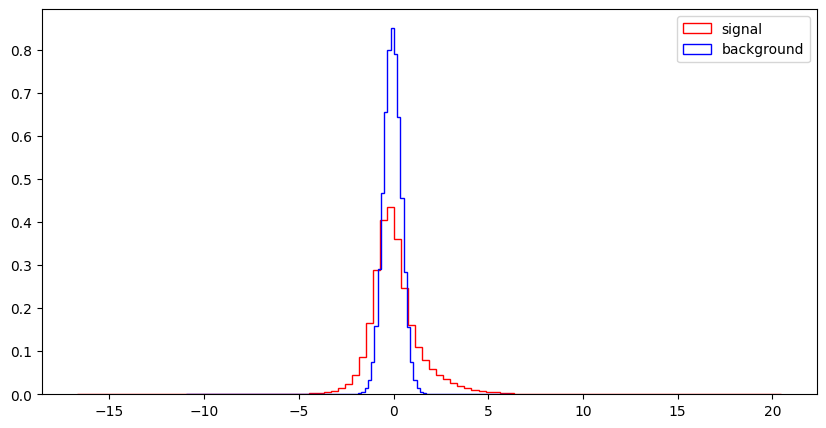

M_R


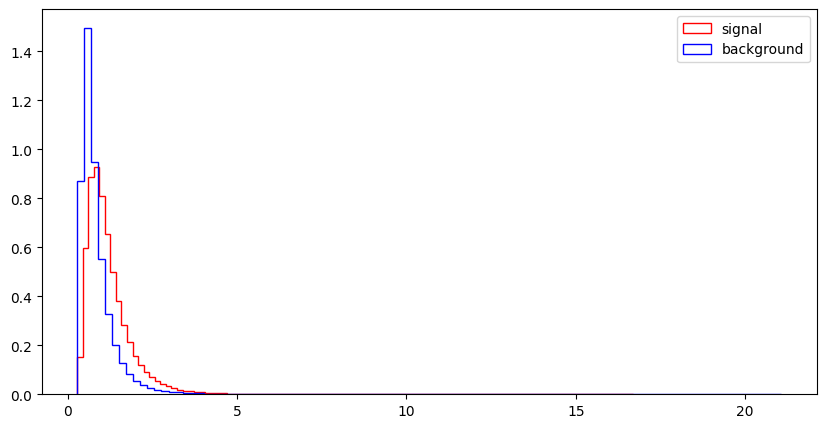

M_TR_2


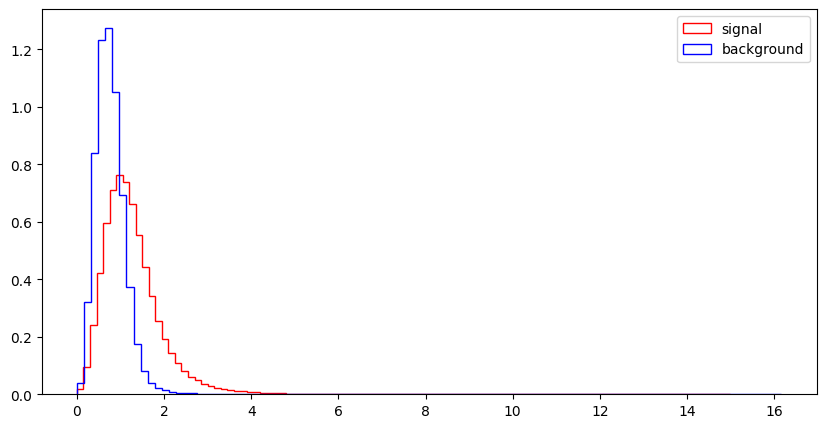

R


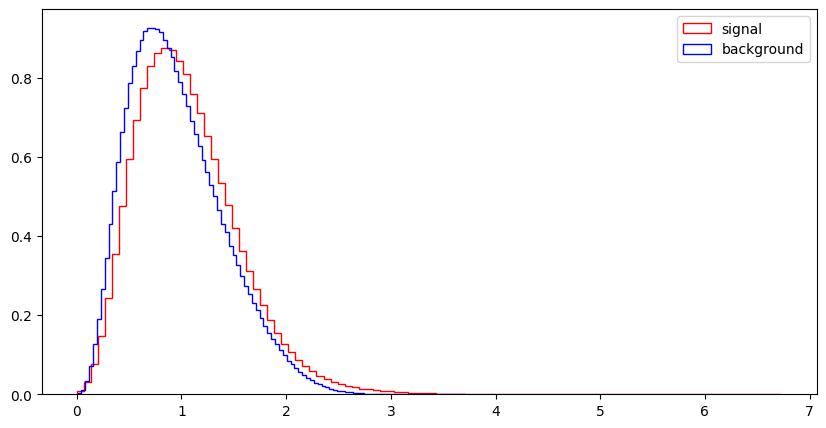

MT2


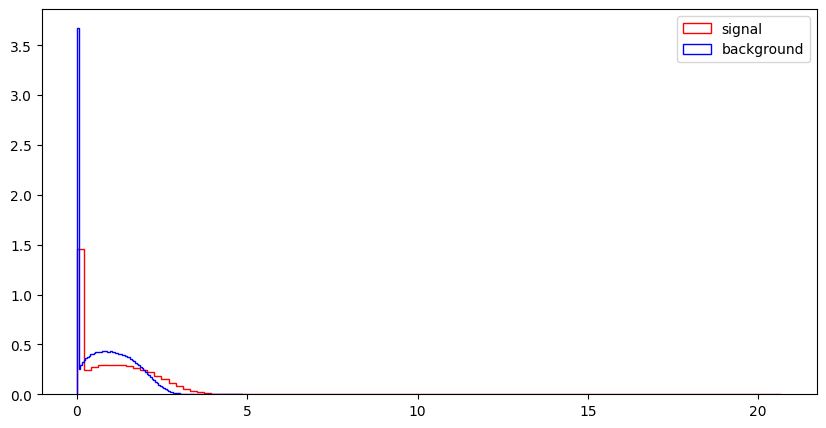

S_R


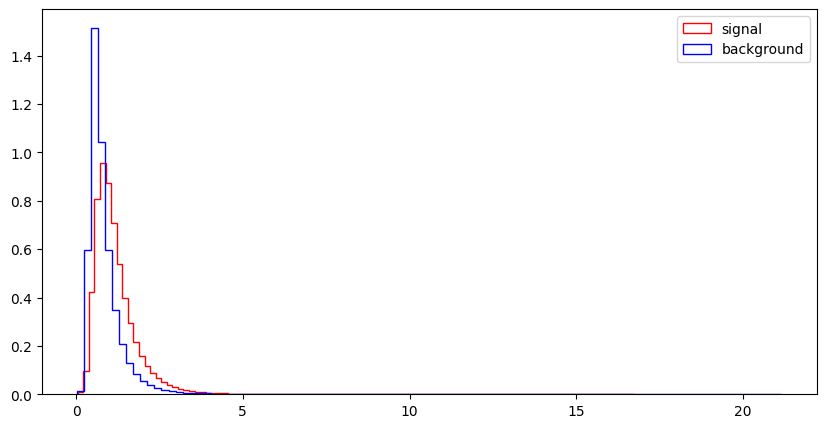

M_Delta_R


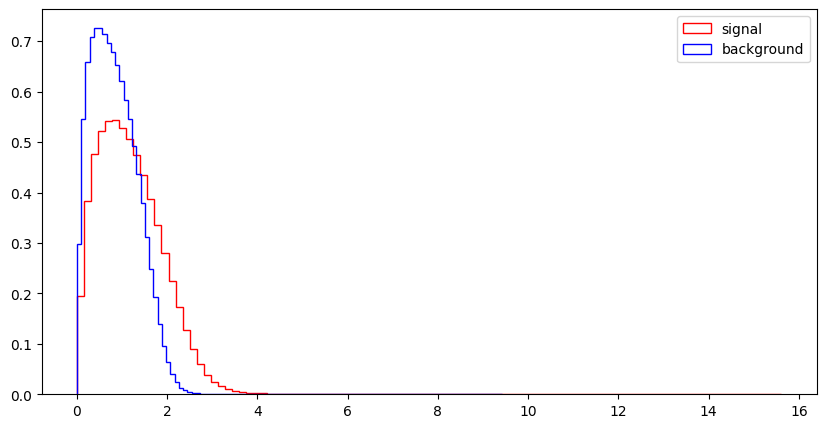

dPhi_r_b


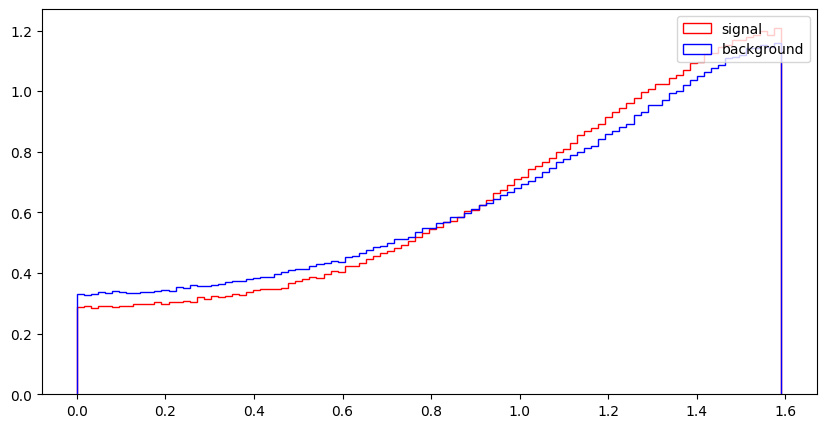

cos_theta_r1


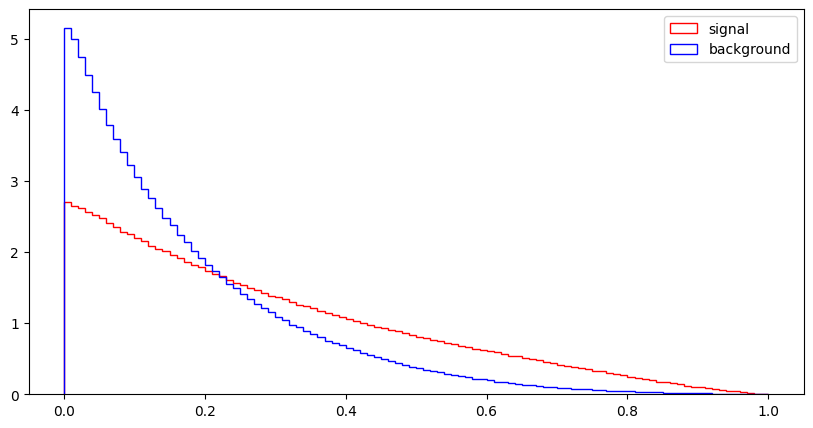

In [12]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

l_1_pT


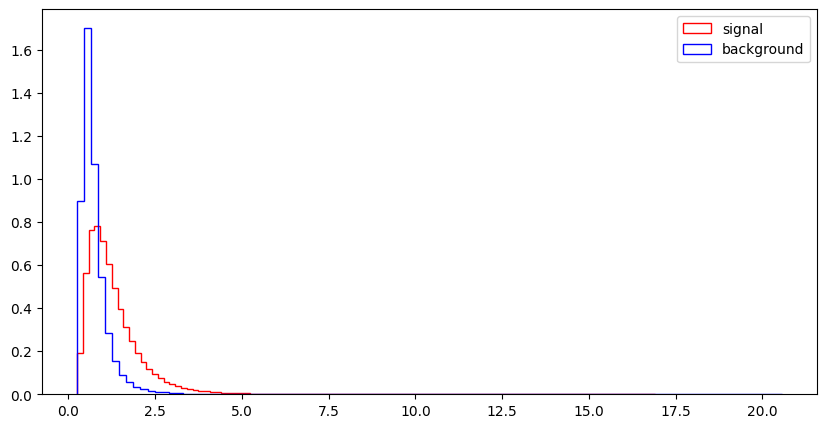

l_1_eta


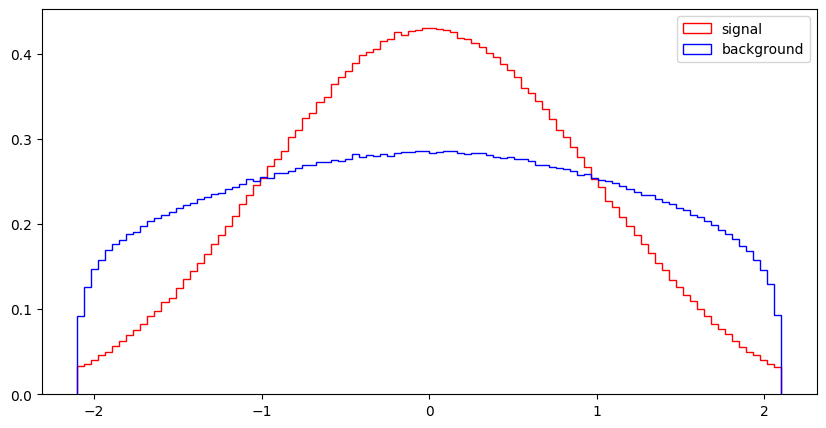

l_1_phi


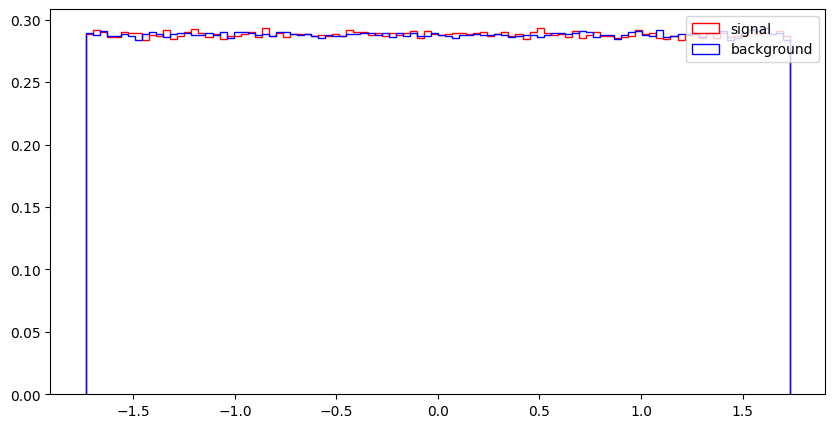

l_2_pT


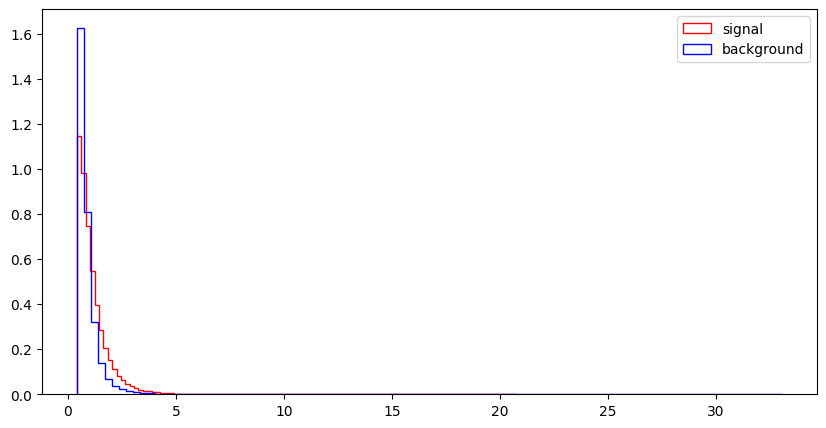

l_2_eta


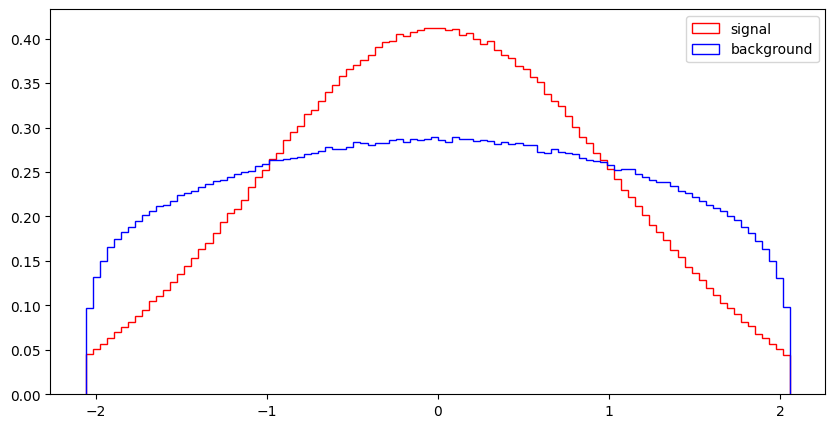

l_2_phi


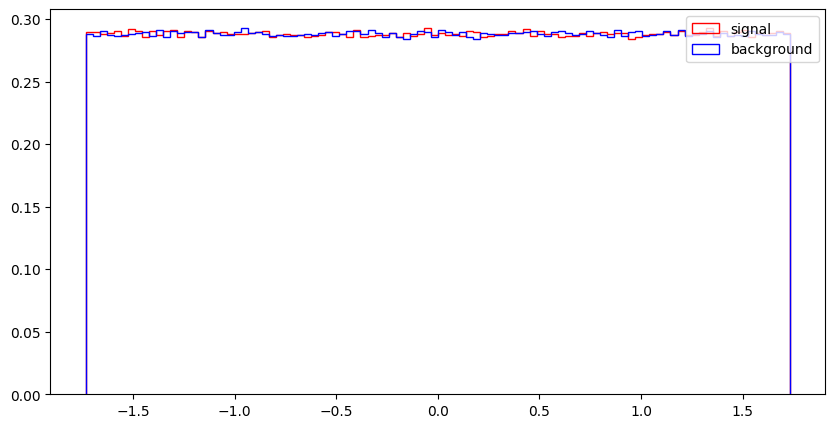

MET


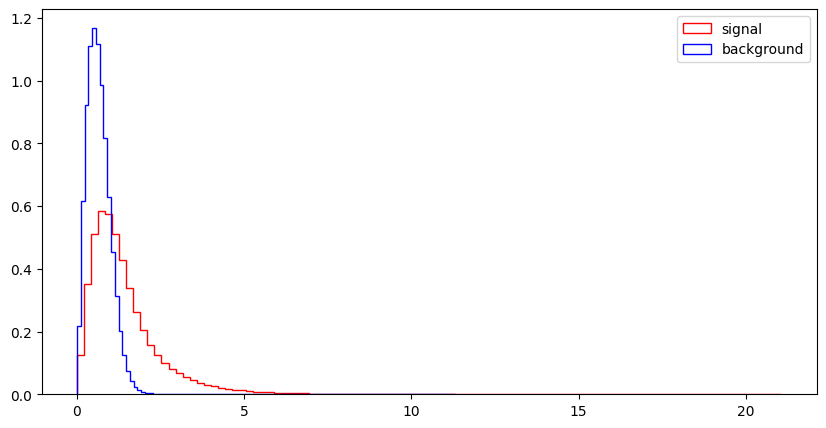

MET_phi


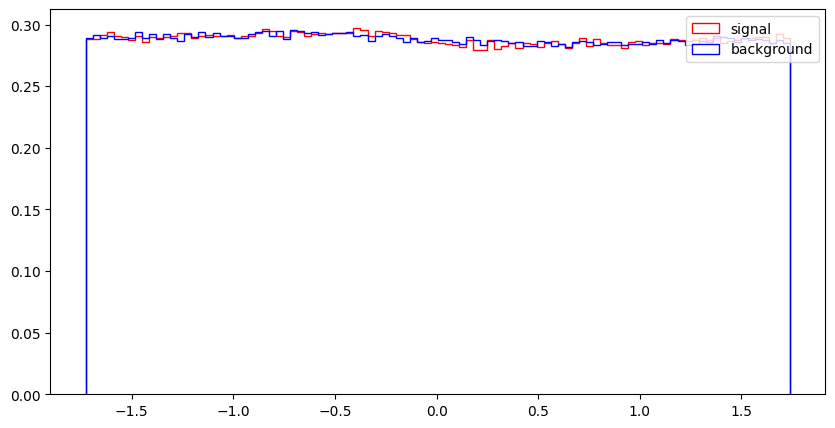

In [13]:
for var in RawNames:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY and Higgs samples, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

In [14]:
# Part a
def compare_distributions(df,column_name,selections,**kwargs):
    for label,selection in selections.items():        
        _=plt.hist(df[selection][column_name],label=label,**kwargs)

    _=plt.legend()

signal


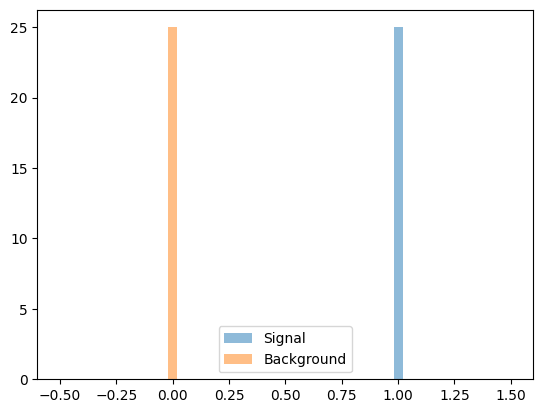

l_1_pT


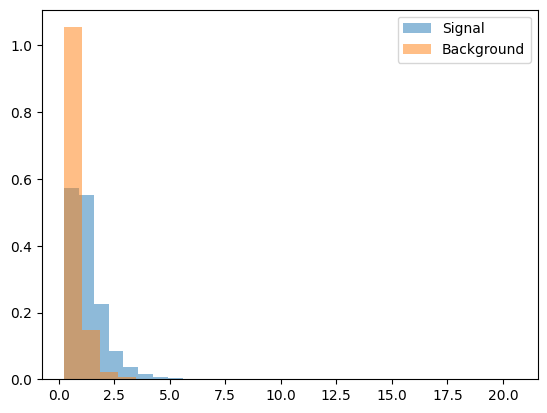

l_1_eta


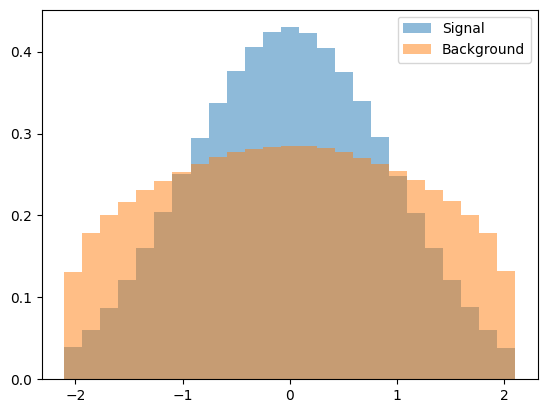

l_1_phi


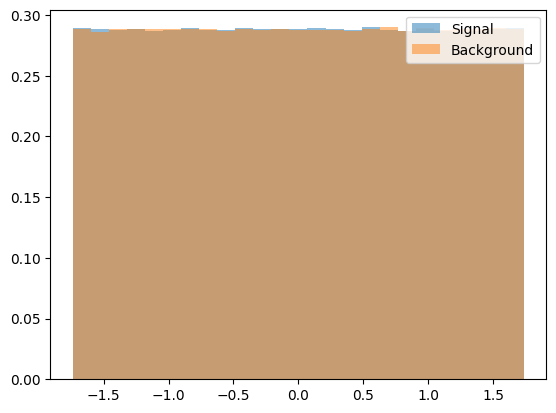

l_2_pT


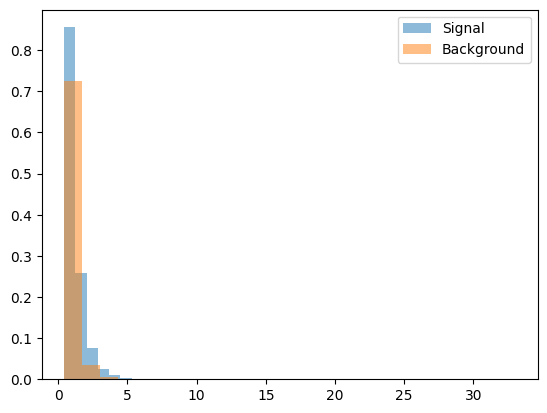

l_2_eta


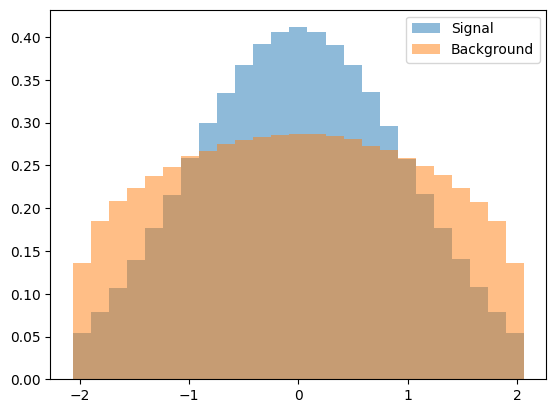

l_2_phi


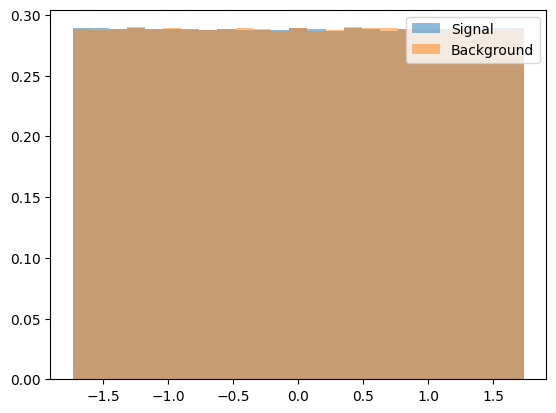

MET


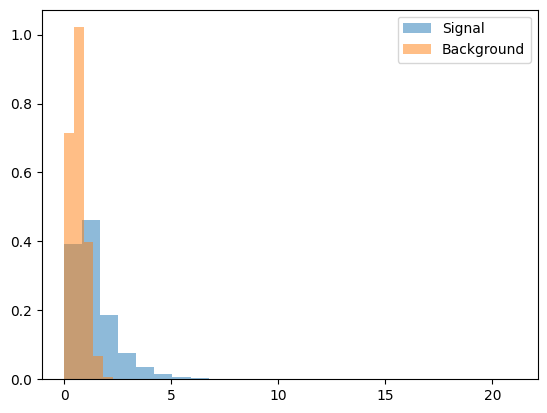

MET_phi


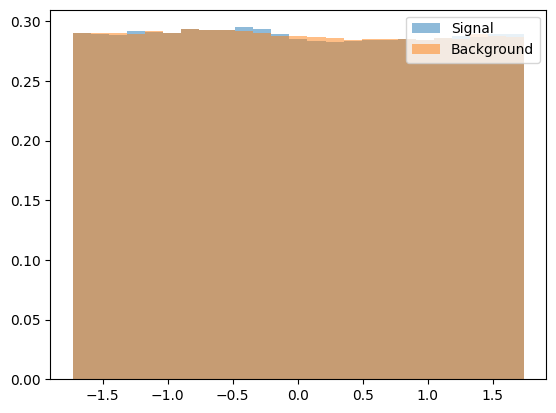

MET_rel


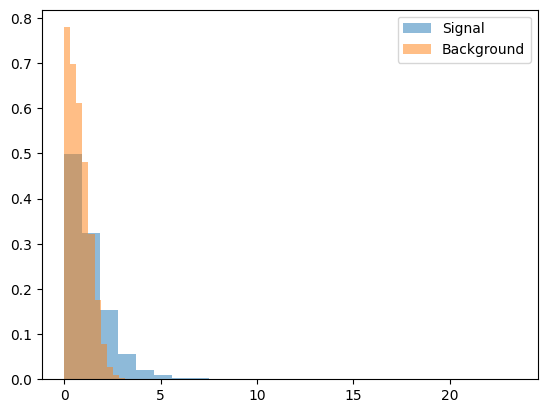

axial_MET


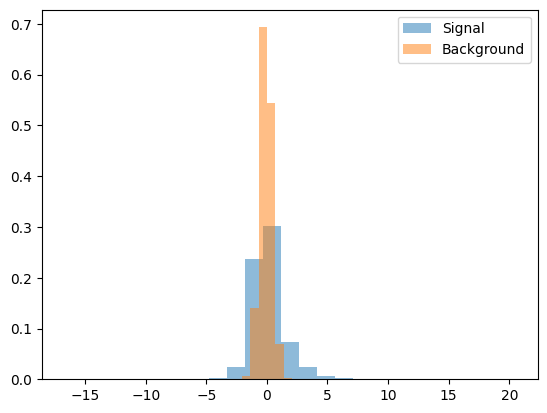

M_R


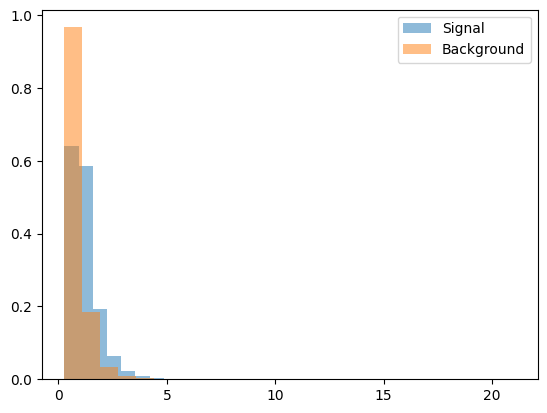

M_TR_2


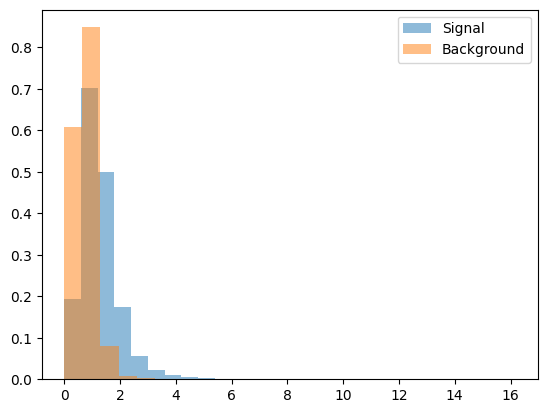

R


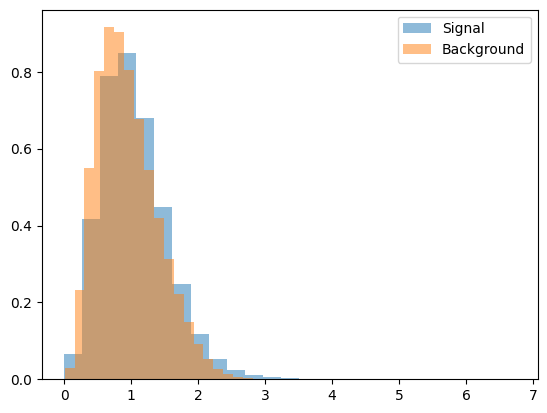

MT2


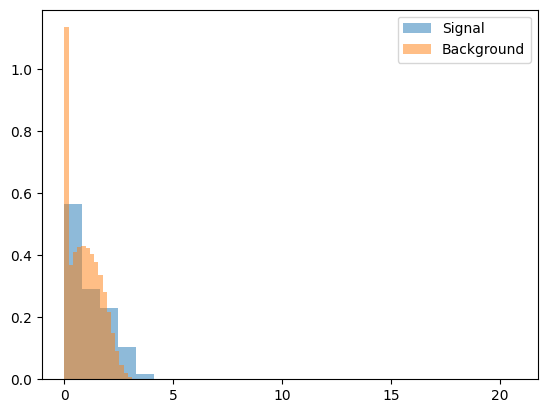

S_R


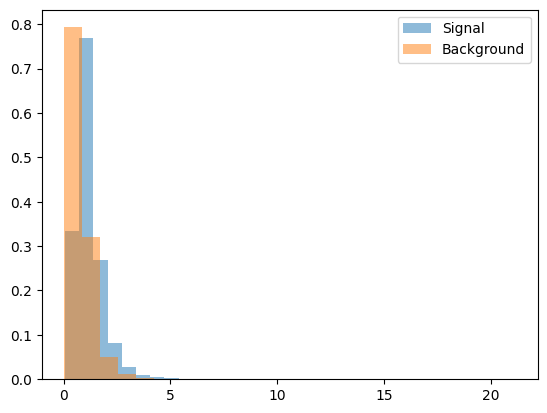

M_Delta_R


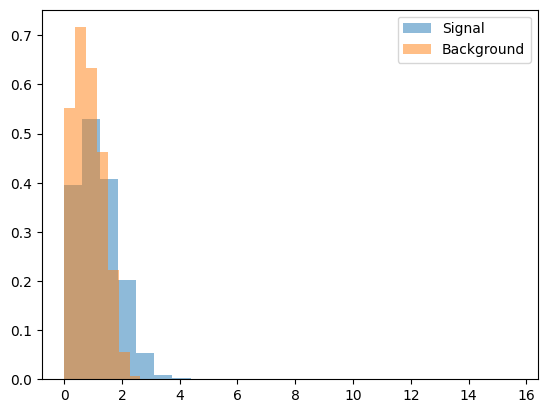

dPhi_r_b


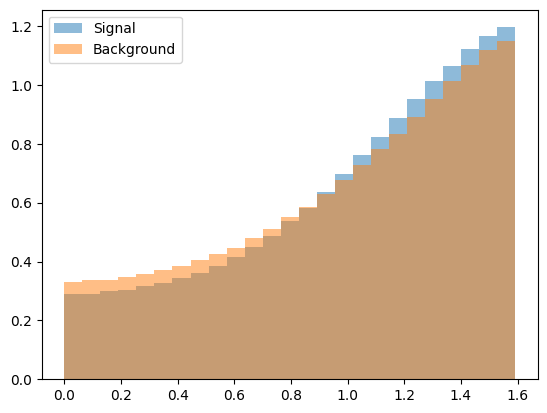

cos_theta_r1


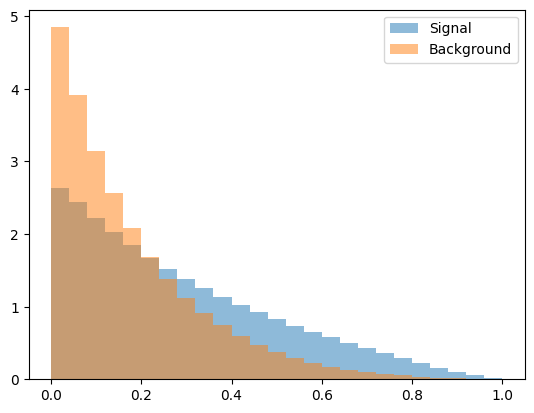

In [15]:
selection_dict={"Signal": df["signal"] == 1, "Background": df["signal"] == 0}

for column_name in df.columns:
    print(column_name)
    compare_distributions(df,column_name,
                     selection_dict,
                     alpha=0.5,
                     density=1,
                     bins=25
                     )
    plt.legend()
    plt.show()

In [16]:
# Part b
import numpy as np
import matplotlib.pyplot as plt

def compare_distributions(df, column_name, selections, **kwargs):
    hist_data = {}
    
    # Pre-compute histograms for each selection
    for label, selection in selections.items():
        hist_data[label] = np.histogram(df[selection][column_name], **kwargs)
    
    # Plot the pre-computed histograms
    for label, hist in hist_data.items():
        plt.hist(hist[1][:-1], bins=hist[1], weights=hist[0], label=label, alpha=0.5)
    
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()

ValueError: num must be an integer with 1 <= num <= 15, not 16

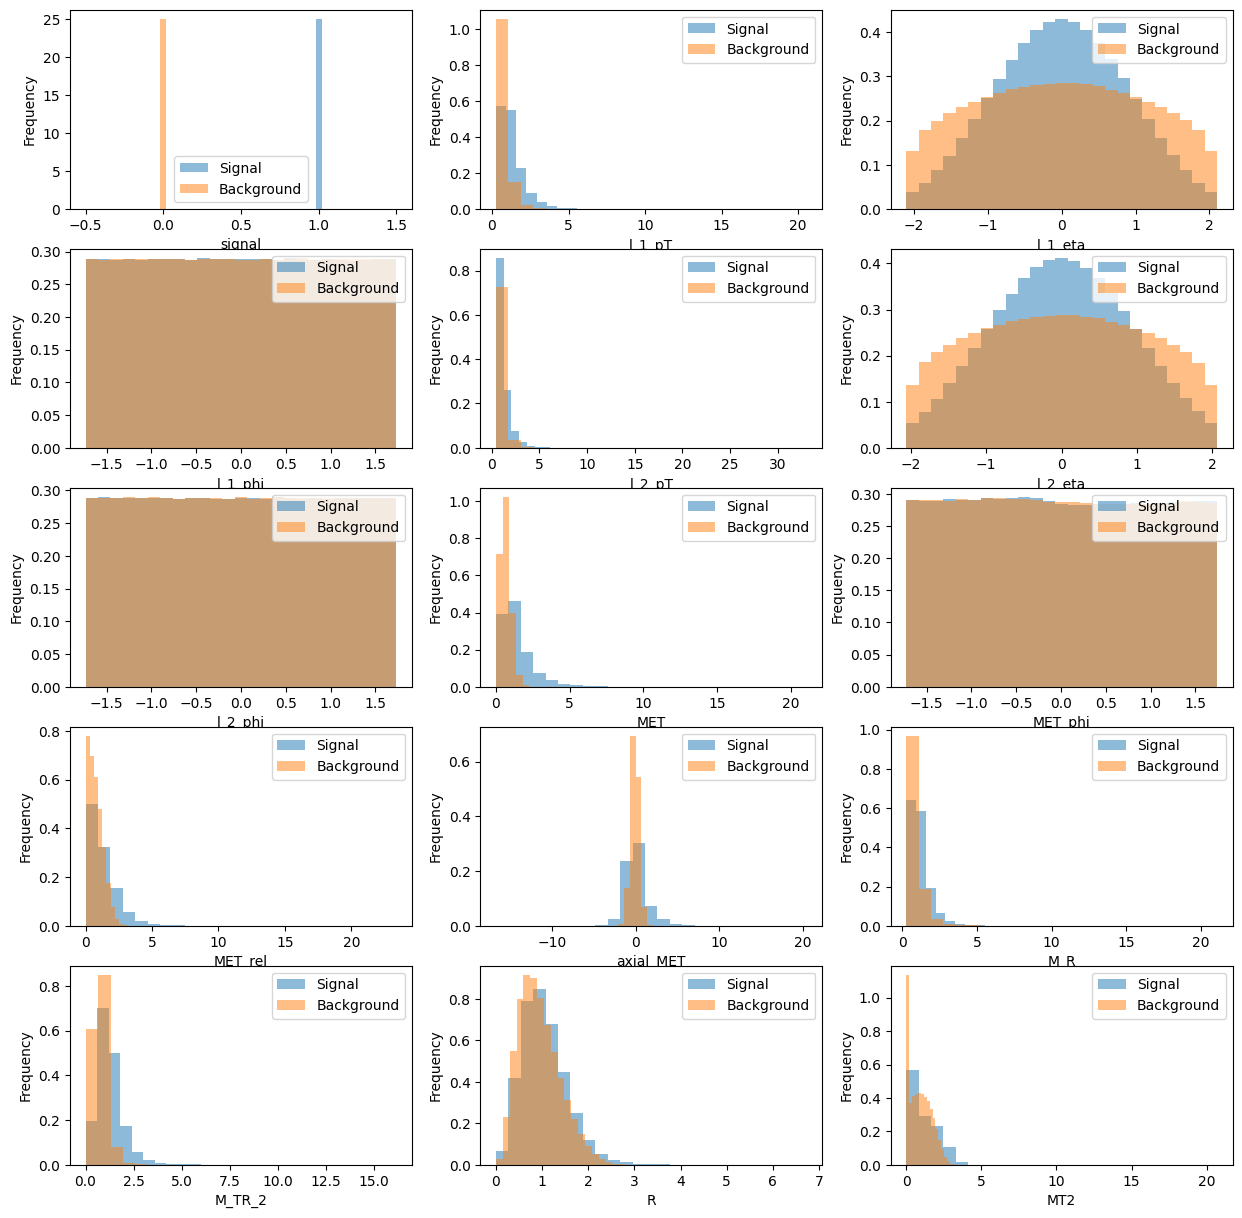

In [17]:
# Example usage
selection_dict = {"Signal": df["signal"] == 1, "Background": df["signal"] == 0}

plt.figure(figsize=(15, 15))

for i, column_name in enumerate(df.columns):
    plt.subplot(5, 3, i + 1)
    compare_distributions(df, column_name, selection_dict, density=1, bins=25)

plt.tight_layout()
plt.show()

In [ ]:
# Part c
# Both low and high-level features are optimal observables for separating signal and background.

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

In [18]:
# Part a
# !pip install tabulate

In [19]:
# !export PATH="$PATH:/home/rcwsl/.local/bin"

In [20]:
# Part b
import numpy as np
import pandas as pd

# Assuming df contains all observables, with low-level features labeled as 'RawNames' and high-level features labeled as 'FeatureNames'

# Separate low-level and high-level features, also have all features
all_features = df[VarNames]
low_features = df[RawNames]
high_features = df[FeatureNames]

# Compute covariance matrix for low-level features
covariance_low = np.cov(low_features.values, rowvar=False)

# Compute correlation matrix for low-level features
correlation_low = np.corrcoef(low_features.values, rowvar=False)

# Compute covariance matrix for high-level features
covariance_high = np.cov(high_features.values, rowvar=False)

# Compute correlation matrix for high-level features
correlation_high = np.corrcoef(high_features.values, rowvar=False)

# Compute covariance matrix for all features
covariance_all = np.cov(all_features.values, rowvar=False)

# Compute correlation matrix for all features
correlation_all = np.corrcoef(all_features.values, rowvar=False)

In [21]:
print(all_features)

         signal    l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
0           0.0  0.972861  0.653855  1.176225  1.157156 -1.739873 -0.874309   
1           1.0  1.667973  0.064191 -1.225171  0.506102 -0.338939  1.672543   
2           1.0  0.444840 -0.134298 -0.709972  0.451719 -1.613871 -0.768661   
3           1.0  0.381256 -0.976145  0.693152  0.448959  0.891753 -0.677328   
4           1.0  1.309996 -0.690089 -0.676259  1.589283 -0.693326  0.622907   
...         ...       ...       ...       ...       ...       ...       ...   
4999995     1.0  0.853325 -0.961783 -1.487277  0.678190  0.493580  1.647969   
4999996     0.0  0.951581  0.139370  1.436884  0.880440 -0.351948 -0.740852   
4999997     0.0  0.840389  1.419162 -1.218766  1.195631  1.695645  0.663756   
4999998     1.0  1.784218 -0.833565 -0.560091  0.953342 -0.688969 -1.428233   
4999999     0.0  0.761500  0.680454 -1.186213  1.043521 -0.316755  0.246879   

              MET   MET_phi   MET_rel  axial_MET   

Hint: Example code for embedding a `tabulate` table into a notebook:

In [22]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


In [23]:
# Part c
import numpy as np
from tabulate import tabulate

# Assuming covariance_low, correlation_low, covariance_high, and correlation_high are previously computed matrices

# Round the matrices to appropriate significant figures
covariance_low_rounded = np.round(covariance_low, decimals=4)
correlation_low_rounded = np.round(correlation_low, decimals=4)
covariance_high_rounded = np.round(covariance_high, decimals=4)
correlation_high_rounded = np.round(correlation_high, decimals=4)
covariance_all_rounded = np.round(covariance_all, decimals=4)
correlation_all_rounded = np.round(correlation_all, decimals=4)

# Create table for covariance and correlation matrices for all features
print("Covariance Matrix (all features):")
display(HTML(tabulate(covariance_all_rounded, headers=df[VarNames], tablefmt='html', floatfmt=".4f")))
print("\nCorrelation Matrix (all features):")
display(HTML(tabulate(correlation_all_rounded, headers=df[VarNames], tablefmt='html', floatfmt=".4f")))

# Create table for covariance and correlation matrices of low-level features
print("Covariance Matrix (Low-level features):")
display(HTML(tabulate(covariance_low_rounded, headers=df[RawNames][0:], tablefmt='html', floatfmt=".4f")))
print("\nCorrelation Matrix (Low-level features):")
display(HTML(tabulate(correlation_low_rounded, headers=df[RawNames][0:], tablefmt='html', floatfmt=".4f")))

# Create table for covariance and correlation matrices of high-level features
print("\nCovariance Matrix (High-level features):")
display(HTML(tabulate(covariance_high_rounded, headers=df[FeatureNames][0:], tablefmt='html', floatfmt=".4f")))
print("\nCorrelation Matrix (High-level features):")
display(HTML(tabulate(correlation_high_rounded, headers=df[FeatureNames][0:], tablefmt='html', floatfmt=".4f")))

Covariance Matrix (all features):


signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0.2482,0.1327,-0.0002,-0.0002,0.0635,0.0002,-0.0000,0.1908,0.0001,0.1254,0.0385,0.0835,0.1231,0.0263,0.0340,0.0799,0.0848,0.0071,0.0264
0.1327,0.4724,-0.0003,-0.0002,0.3079,-0.0003,0.0002,0.2310,-0.0007,0.0986,-0.0125,0.3681,0.2908,-0.0593,-0.0128,0.3463,0.0981,-0.0470,0.0225
-0.0002,-0.0003,1.0062,0.0003,-0.0004,0.4059,0.0003,-0.0006,-0.0005,-0.0005,-0.0005,-0.0003,-0.0003,0.0001,-0.0002,-0.0003,-0.0005,0.0001,0.0001
-0.0002,-0.0002,0.0003,1.0033,-0.0001,0.0006,-0.2681,0.0012,-0.1842,0.0015,-0.0020,-0.0002,0.0008,0.0009,0.0018,0.0000,0.0013,0.0010,0.0003
0.0635,0.3079,-0.0004,-0.0001,0.4280,-0.0005,0.0001,0.0797,-0.0014,-0.0023,0.0498,0.3281,0.1644,-0.0993,-0.0691,0.3246,0.0056,-0.0041,-0.0278
0.0002,-0.0003,0.4059,0.0006,-0.0005,1.0057,-0.0001,0.0001,-0.0001,0.0001,-0.0002,-0.0005,-0.0002,0.0003,-0.0001,-0.0006,-0.0002,-0.0001,0.0002
-0.0000,0.0002,0.0003,-0.2681,0.0001,-0.0001,1.0033,0.0000,-0.0345,0.0002,-0.0001,0.0003,0.0003,0.0002,0.0012,0.0004,0.0005,0.0002,-0.0002
0.1908,0.2310,-0.0006,0.0012,0.0797,0.0001,0.0000,0.7619,-0.0016,0.5484,0.1448,0.1459,0.3681,0.1886,0.1564,0.1673,0.3166,0.1453,0.0733
0.0001,-0.0007,-0.0005,-0.1842,-0.0014,-0.0001,-0.0345,-0.0016,1.0033,-0.0029,-0.0010,-0.0010,-0.0008,-0.0002,0.0005,-0.0011,-0.0004,-0.0013,0.0001
0.1254,0.0986,-0.0005,0.0015,-0.0023,0.0001,0.0002,0.5484,-0.0029,0.7924,-0.1253,0.0437,0.3033,0.2495,0.4100,0.0824,0.4157,0.1466,0.0556



Correlation Matrix (all features):


signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1.0000,0.3874,-0.0003,-0.0005,0.1948,0.0004,-0.0001,0.4388,0.0001,0.2828,0.0771,0.2666,0.4230,0.1119,0.0794,0.2583,0.2730,0.0327,0.2688
0.3874,1.0000,-0.0004,-0.0003,0.6847,-0.0004,0.0003,0.3849,-0.0010,0.1611,-0.0182,0.8516,0.7244,-0.1832,-0.0216,0.8117,0.2288,-0.1569,0.1663
-0.0003,-0.0004,1.0000,0.0003,-0.0006,0.4035,0.0003,-0.0006,-0.0005,-0.0006,-0.0005,-0.0005,-0.0005,0.0003,-0.0002,-0.0005,-0.0008,0.0002,0.0007
-0.0005,-0.0003,0.0003,1.0000,-0.0002,0.0006,-0.2672,0.0014,-0.1836,0.0017,-0.0020,-0.0003,0.0014,0.0019,0.0020,0.0001,0.0021,0.0022,0.0015
0.1948,0.6847,-0.0006,-0.0002,1.0000,-0.0007,0.0002,0.1396,-0.0021,-0.0039,0.0760,0.7976,0.4302,-0.3224,-0.1230,0.7994,0.0136,-0.0144,-0.2157
0.0004,-0.0004,0.4035,0.0006,-0.0007,1.0000,-0.0001,0.0001,-0.0001,0.0001,-0.0002,-0.0009,-0.0003,0.0005,-0.0001,-0.0009,-0.0003,-0.0001,0.0010
-0.0001,0.0003,0.0003,-0.2672,0.0002,-0.0001,1.0000,0.0000,-0.0344,0.0002,-0.0001,0.0005,0.0005,0.0005,0.0014,0.0006,0.0008,0.0006,-0.0010
0.4388,0.3849,-0.0006,0.0014,0.1396,0.0001,0.0000,1.0000,-0.0019,0.7057,0.1656,0.2658,0.7220,0.4588,0.2085,0.3088,0.5815,0.3816,0.4261
0.0001,-0.0010,-0.0005,-0.1836,-0.0021,-0.0001,-0.0344,-0.0019,1.0000,-0.0033,-0.0010,-0.0015,-0.0014,-0.0003,0.0006,-0.0018,-0.0006,-0.0030,0.0003
0.2828,0.1611,-0.0006,0.0017,-0.0039,0.0001,0.0002,0.7057,-0.0033,1.0000,-0.1405,0.0781,0.5834,0.5953,0.5361,0.1492,0.7486,0.3776,0.3171


Covariance Matrix (Low-level features):


l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
0.4724,-0.0003,-0.0002,0.3079,-0.0003,0.0002,0.2310,-0.0007
-0.0003,1.0062,0.0003,-0.0004,0.4059,0.0003,-0.0006,-0.0005
-0.0002,0.0003,1.0033,-0.0001,0.0006,-0.2681,0.0012,-0.1842
0.3079,-0.0004,-0.0001,0.4280,-0.0005,0.0001,0.0797,-0.0014
-0.0003,0.4059,0.0006,-0.0005,1.0057,-0.0001,0.0001,-0.0001
0.0002,0.0003,-0.2681,0.0001,-0.0001,1.0033,0.0000,-0.0345
0.2310,-0.0006,0.0012,0.0797,0.0001,0.0000,0.7619,-0.0016
-0.0007,-0.0005,-0.1842,-0.0014,-0.0001,-0.0345,-0.0016,1.0033



Correlation Matrix (Low-level features):


l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
1.0000,-0.0004,-0.0003,0.6847,-0.0004,0.0003,0.3849,-0.0010
-0.0004,1.0000,0.0003,-0.0006,0.4035,0.0003,-0.0006,-0.0005
-0.0003,0.0003,1.0000,-0.0002,0.0006,-0.2672,0.0014,-0.1836
0.6847,-0.0006,-0.0002,1.0000,-0.0007,0.0002,0.1396,-0.0021
-0.0004,0.4035,0.0006,-0.0007,1.0000,-0.0001,0.0001,-0.0001
0.0003,0.0003,-0.2672,0.0002,-0.0001,1.0000,0.0000,-0.0344
0.3849,-0.0006,0.0014,0.1396,0.0001,0.0000,1.0000,-0.0019
-0.0010,-0.0005,-0.1836,-0.0021,-0.0001,-0.0344,-0.0019,1.0000



Covariance Matrix (High-level features):


S_R,MT2,cos_theta_r1,R,M_R,MET_rel,dPhi_r_b,M_Delta_R,M_TR_2,axial_MET
0.3853,-0.0112,-0.0102,-0.0834,0.3831,0.0824,-0.0036,0.0961,0.2304,-0.0434
-0.0112,0.7383,0.0445,0.2322,-0.0366,0.4100,0.0212,0.4333,0.1895,-0.4603
-0.0102,0.0445,0.0388,0.0582,-0.0142,0.0556,0.0091,0.0392,0.0519,-0.0541
-0.0834,0.2322,0.0582,0.2217,-0.1129,0.2495,0.0871,0.1656,0.1045,-0.1816
0.3831,-0.0366,-0.0142,-0.1129,0.3954,0.0437,-0.0291,0.0743,0.2122,0.0151
0.0824,0.4100,0.0556,0.2495,0.0437,0.7924,0.1466,0.4157,0.3033,-0.1253
-0.0036,0.0212,0.0091,0.0871,-0.0291,0.1466,0.1902,0.0424,0.0581,-0.0262
0.0961,0.4333,0.0392,0.1656,0.0743,0.4157,0.0424,0.3891,0.2425,-0.2341
0.2304,0.1895,0.0519,0.1045,0.2122,0.3033,0.0581,0.2425,0.3412,-0.1887
-0.0434,-0.4603,-0.0541,-0.1816,0.0151,-0.1253,-0.0262,-0.2341,-0.1887,1.0032



Correlation Matrix (High-level features):


S_R,MT2,cos_theta_r1,R,M_R,MET_rel,dPhi_r_b,M_Delta_R,M_TR_2,axial_MET
1.0000,-0.0209,-0.0836,-0.2855,0.9814,0.1492,-0.0134,0.2483,0.6356,-0.0698
-0.0209,1.0000,0.2631,0.5740,-0.0678,0.5361,0.0565,0.8085,0.3776,-0.5349
-0.0836,0.2631,1.0000,0.6273,-0.1146,0.3171,0.1063,0.3190,0.4515,-0.2743
-0.2855,0.5740,0.6273,1.0000,-0.3814,0.5953,0.4243,0.5640,0.3798,-0.3852
0.9814,-0.0678,-0.1146,-0.3814,1.0000,0.0781,-0.1062,0.1894,0.5776,0.0240
0.1492,0.5361,0.3171,0.5953,0.0781,1.0000,0.3776,0.7486,0.5834,-0.1405
-0.0134,0.0565,0.1063,0.4243,-0.1062,0.3776,1.0000,0.1558,0.2282,-0.0600
0.2483,0.8085,0.3190,0.5640,0.1894,0.7486,0.1558,1.0000,0.6655,-0.3747
0.6356,0.3776,0.4515,0.3798,0.5776,0.5834,0.2282,0.6655,1.0000,-0.3226
-0.0698,-0.5349,-0.2743,-0.3852,0.0240,-0.1405,-0.0600,-0.3747,-0.3226,1.0000


In [24]:
# Part d
import numpy as np
import pandas as pd
from tabulate import tabulate
from IPython.display import display, HTML

def compute_covariance_and_correlation(df, VarNames, RawNames, FeatureNames):
    # Separate low-level and high-level features, also have all features
    all_features = df[VarNames]
    low_features = df[RawNames]
    high_features = df[FeatureNames]

    # Compute covariance matrix for low-level features
    covariance_low = np.cov(low_features.values, rowvar=False)

    # Compute correlation matrix for low-level features
    correlation_low = np.corrcoef(low_features.values, rowvar=False)

    # Compute covariance matrix for high-level features
    covariance_high = np.cov(high_features.values, rowvar=False)

    # Compute correlation matrix for high-level features
    correlation_high = np.corrcoef(high_features.values, rowvar=False)

    # Compute covariance matrix for all features
    covariance_all = np.cov(all_features.values, rowvar=False)

    # Compute correlation matrix for all features
    correlation_all = np.corrcoef(all_features.values, rowvar=False)

    # Round the matrices to appropriate significant figures
    covariance_low_rounded = np.round(covariance_low, decimals=4)
    correlation_low_rounded = np.round(correlation_low, decimals=4)
    covariance_high_rounded = np.round(covariance_high, decimals=4)
    correlation_high_rounded = np.round(correlation_high, decimals=4)
    covariance_all_rounded = np.round(covariance_all, decimals=4)
    correlation_all_rounded = np.round(correlation_all, decimals=4)

    # Create table for covariance and correlation matrices for all features
    print("Covariance Matrix (all features):")
    display(HTML(tabulate(covariance_all_rounded, headers=df[VarNames], tablefmt='html', floatfmt=".4f")))
    print("\nCorrelation Matrix (all features):")
    display(HTML(tabulate(correlation_all_rounded, headers=df[VarNames], tablefmt='html', floatfmt=".4f")))

    # Create table for covariance and correlation matrices of low-level features
    print("Covariance Matrix (Low-level features):")
    display(HTML(tabulate(covariance_low_rounded, headers=df[RawNames][0:], tablefmt='html', floatfmt=".4f")))
    print("\nCorrelation Matrix (Low-level features):")
    display(HTML(tabulate(correlation_low_rounded, headers=df[RawNames][0:], tablefmt='html', floatfmt=".4f")))

    # Create table for covariance and correlation matrices of high-level features
    print("\nCovariance Matrix (High-level features):")
    display(HTML(tabulate(covariance_high_rounded, headers=df[FeatureNames][0:], tablefmt='html', floatfmt=".4f")))
    print("\nCorrelation Matrix (High-level features):")
    display(HTML(tabulate(correlation_high_rounded, headers=df[FeatureNames][0:], tablefmt='html', floatfmt=".4f")))

In [25]:
# Example usage:
# Assuming df contains your dataset and VarNames, RawNames, FeatureNames are lists of column names
compute_covariance_and_correlation(df, VarNames, RawNames, FeatureNames)

Covariance Matrix (all features):


signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0.2482,0.1327,-0.0002,-0.0002,0.0635,0.0002,-0.0000,0.1908,0.0001,0.1254,0.0385,0.0835,0.1231,0.0263,0.0340,0.0799,0.0848,0.0071,0.0264
0.1327,0.4724,-0.0003,-0.0002,0.3079,-0.0003,0.0002,0.2310,-0.0007,0.0986,-0.0125,0.3681,0.2908,-0.0593,-0.0128,0.3463,0.0981,-0.0470,0.0225
-0.0002,-0.0003,1.0062,0.0003,-0.0004,0.4059,0.0003,-0.0006,-0.0005,-0.0005,-0.0005,-0.0003,-0.0003,0.0001,-0.0002,-0.0003,-0.0005,0.0001,0.0001
-0.0002,-0.0002,0.0003,1.0033,-0.0001,0.0006,-0.2681,0.0012,-0.1842,0.0015,-0.0020,-0.0002,0.0008,0.0009,0.0018,0.0000,0.0013,0.0010,0.0003
0.0635,0.3079,-0.0004,-0.0001,0.4280,-0.0005,0.0001,0.0797,-0.0014,-0.0023,0.0498,0.3281,0.1644,-0.0993,-0.0691,0.3246,0.0056,-0.0041,-0.0278
0.0002,-0.0003,0.4059,0.0006,-0.0005,1.0057,-0.0001,0.0001,-0.0001,0.0001,-0.0002,-0.0005,-0.0002,0.0003,-0.0001,-0.0006,-0.0002,-0.0001,0.0002
-0.0000,0.0002,0.0003,-0.2681,0.0001,-0.0001,1.0033,0.0000,-0.0345,0.0002,-0.0001,0.0003,0.0003,0.0002,0.0012,0.0004,0.0005,0.0002,-0.0002
0.1908,0.2310,-0.0006,0.0012,0.0797,0.0001,0.0000,0.7619,-0.0016,0.5484,0.1448,0.1459,0.3681,0.1886,0.1564,0.1673,0.3166,0.1453,0.0733
0.0001,-0.0007,-0.0005,-0.1842,-0.0014,-0.0001,-0.0345,-0.0016,1.0033,-0.0029,-0.0010,-0.0010,-0.0008,-0.0002,0.0005,-0.0011,-0.0004,-0.0013,0.0001
0.1254,0.0986,-0.0005,0.0015,-0.0023,0.0001,0.0002,0.5484,-0.0029,0.7924,-0.1253,0.0437,0.3033,0.2495,0.4100,0.0824,0.4157,0.1466,0.0556



Correlation Matrix (all features):


signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1.0000,0.3874,-0.0003,-0.0005,0.1948,0.0004,-0.0001,0.4388,0.0001,0.2828,0.0771,0.2666,0.4230,0.1119,0.0794,0.2583,0.2730,0.0327,0.2688
0.3874,1.0000,-0.0004,-0.0003,0.6847,-0.0004,0.0003,0.3849,-0.0010,0.1611,-0.0182,0.8516,0.7244,-0.1832,-0.0216,0.8117,0.2288,-0.1569,0.1663
-0.0003,-0.0004,1.0000,0.0003,-0.0006,0.4035,0.0003,-0.0006,-0.0005,-0.0006,-0.0005,-0.0005,-0.0005,0.0003,-0.0002,-0.0005,-0.0008,0.0002,0.0007
-0.0005,-0.0003,0.0003,1.0000,-0.0002,0.0006,-0.2672,0.0014,-0.1836,0.0017,-0.0020,-0.0003,0.0014,0.0019,0.0020,0.0001,0.0021,0.0022,0.0015
0.1948,0.6847,-0.0006,-0.0002,1.0000,-0.0007,0.0002,0.1396,-0.0021,-0.0039,0.0760,0.7976,0.4302,-0.3224,-0.1230,0.7994,0.0136,-0.0144,-0.2157
0.0004,-0.0004,0.4035,0.0006,-0.0007,1.0000,-0.0001,0.0001,-0.0001,0.0001,-0.0002,-0.0009,-0.0003,0.0005,-0.0001,-0.0009,-0.0003,-0.0001,0.0010
-0.0001,0.0003,0.0003,-0.2672,0.0002,-0.0001,1.0000,0.0000,-0.0344,0.0002,-0.0001,0.0005,0.0005,0.0005,0.0014,0.0006,0.0008,0.0006,-0.0010
0.4388,0.3849,-0.0006,0.0014,0.1396,0.0001,0.0000,1.0000,-0.0019,0.7057,0.1656,0.2658,0.7220,0.4588,0.2085,0.3088,0.5815,0.3816,0.4261
0.0001,-0.0010,-0.0005,-0.1836,-0.0021,-0.0001,-0.0344,-0.0019,1.0000,-0.0033,-0.0010,-0.0015,-0.0014,-0.0003,0.0006,-0.0018,-0.0006,-0.0030,0.0003
0.2828,0.1611,-0.0006,0.0017,-0.0039,0.0001,0.0002,0.7057,-0.0033,1.0000,-0.1405,0.0781,0.5834,0.5953,0.5361,0.1492,0.7486,0.3776,0.3171


Covariance Matrix (Low-level features):


l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
0.4724,-0.0003,-0.0002,0.3079,-0.0003,0.0002,0.2310,-0.0007
-0.0003,1.0062,0.0003,-0.0004,0.4059,0.0003,-0.0006,-0.0005
-0.0002,0.0003,1.0033,-0.0001,0.0006,-0.2681,0.0012,-0.1842
0.3079,-0.0004,-0.0001,0.4280,-0.0005,0.0001,0.0797,-0.0014
-0.0003,0.4059,0.0006,-0.0005,1.0057,-0.0001,0.0001,-0.0001
0.0002,0.0003,-0.2681,0.0001,-0.0001,1.0033,0.0000,-0.0345
0.2310,-0.0006,0.0012,0.0797,0.0001,0.0000,0.7619,-0.0016
-0.0007,-0.0005,-0.1842,-0.0014,-0.0001,-0.0345,-0.0016,1.0033



Correlation Matrix (Low-level features):


l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
1.0000,-0.0004,-0.0003,0.6847,-0.0004,0.0003,0.3849,-0.0010
-0.0004,1.0000,0.0003,-0.0006,0.4035,0.0003,-0.0006,-0.0005
-0.0003,0.0003,1.0000,-0.0002,0.0006,-0.2672,0.0014,-0.1836
0.6847,-0.0006,-0.0002,1.0000,-0.0007,0.0002,0.1396,-0.0021
-0.0004,0.4035,0.0006,-0.0007,1.0000,-0.0001,0.0001,-0.0001
0.0003,0.0003,-0.2672,0.0002,-0.0001,1.0000,0.0000,-0.0344
0.3849,-0.0006,0.0014,0.1396,0.0001,0.0000,1.0000,-0.0019
-0.0010,-0.0005,-0.1836,-0.0021,-0.0001,-0.0344,-0.0019,1.0000



Covariance Matrix (High-level features):


S_R,MT2,cos_theta_r1,R,M_R,MET_rel,dPhi_r_b,M_Delta_R,M_TR_2,axial_MET
0.3853,-0.0112,-0.0102,-0.0834,0.3831,0.0824,-0.0036,0.0961,0.2304,-0.0434
-0.0112,0.7383,0.0445,0.2322,-0.0366,0.4100,0.0212,0.4333,0.1895,-0.4603
-0.0102,0.0445,0.0388,0.0582,-0.0142,0.0556,0.0091,0.0392,0.0519,-0.0541
-0.0834,0.2322,0.0582,0.2217,-0.1129,0.2495,0.0871,0.1656,0.1045,-0.1816
0.3831,-0.0366,-0.0142,-0.1129,0.3954,0.0437,-0.0291,0.0743,0.2122,0.0151
0.0824,0.4100,0.0556,0.2495,0.0437,0.7924,0.1466,0.4157,0.3033,-0.1253
-0.0036,0.0212,0.0091,0.0871,-0.0291,0.1466,0.1902,0.0424,0.0581,-0.0262
0.0961,0.4333,0.0392,0.1656,0.0743,0.4157,0.0424,0.3891,0.2425,-0.2341
0.2304,0.1895,0.0519,0.1045,0.2122,0.3033,0.0581,0.2425,0.3412,-0.1887
-0.0434,-0.4603,-0.0541,-0.1816,0.0151,-0.1253,-0.0262,-0.2341,-0.1887,1.0032



Correlation Matrix (High-level features):


S_R,MT2,cos_theta_r1,R,M_R,MET_rel,dPhi_r_b,M_Delta_R,M_TR_2,axial_MET
1.0000,-0.0209,-0.0836,-0.2855,0.9814,0.1492,-0.0134,0.2483,0.6356,-0.0698
-0.0209,1.0000,0.2631,0.5740,-0.0678,0.5361,0.0565,0.8085,0.3776,-0.5349
-0.0836,0.2631,1.0000,0.6273,-0.1146,0.3171,0.1063,0.3190,0.4515,-0.2743
-0.2855,0.5740,0.6273,1.0000,-0.3814,0.5953,0.4243,0.5640,0.3798,-0.3852
0.9814,-0.0678,-0.1146,-0.3814,1.0000,0.0781,-0.1062,0.1894,0.5776,0.0240
0.1492,0.5361,0.3171,0.5953,0.0781,1.0000,0.3776,0.7486,0.5834,-0.1405
-0.0134,0.0565,0.1063,0.4243,-0.1062,0.3776,1.0000,0.1558,0.2282,-0.0600
0.2483,0.8085,0.3190,0.5640,0.1894,0.7486,0.1558,1.0000,0.6655,-0.3747
0.6356,0.3776,0.4515,0.3798,0.5776,0.5834,0.2282,0.6655,1.0000,-0.3226
-0.0698,-0.5349,-0.2743,-0.3852,0.0240,-0.1405,-0.0600,-0.3747,-0.3226,1.0000


## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

In [26]:
# Exercise 5.1
# Here is a list of the observables and which selection criteria I believe would be the most optimal:

# signal: x > x_c
# l_1_pT: x > x_c
# l_1_eta: |x - mu| > x_c
# l_1_phi: |x - mu| > x_c
# l_2_pT: x > x_c
# l_2_eta: |x - mu| > x_c
# l_2_phi: |x - mu| > x_c
# MET: x > x_c
# MET_phi: |x - mu| > x_c
# R: |x - mu| > x_c
# M_TR_2: x > x_c
# axial_MET: |x - mu| > x_c
# dPhi_r_b: x < x_c
# M_Delta_R: |x - mu| > x_c
# S_R: x > x_c
# cos_theta_r1: x > x_c
# MT2: x > x_c
# M_R: x > x_c
# MET_rel: x > x_c


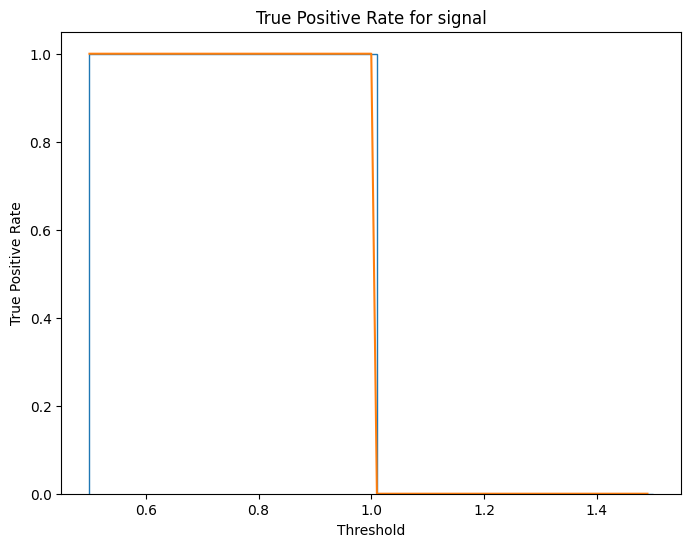

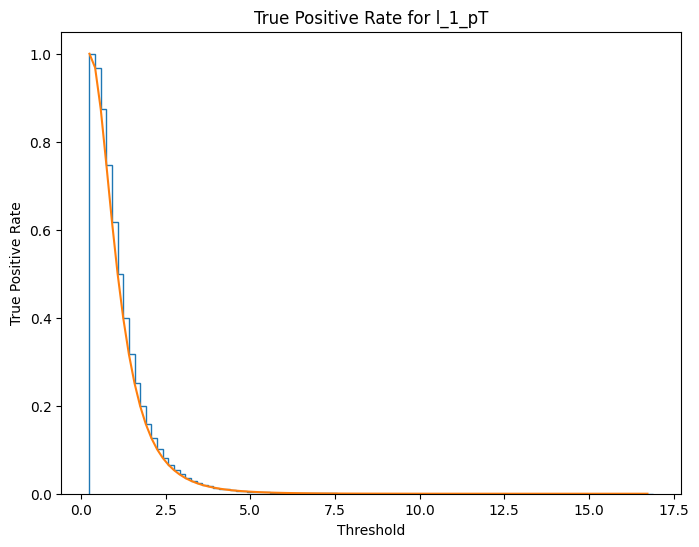

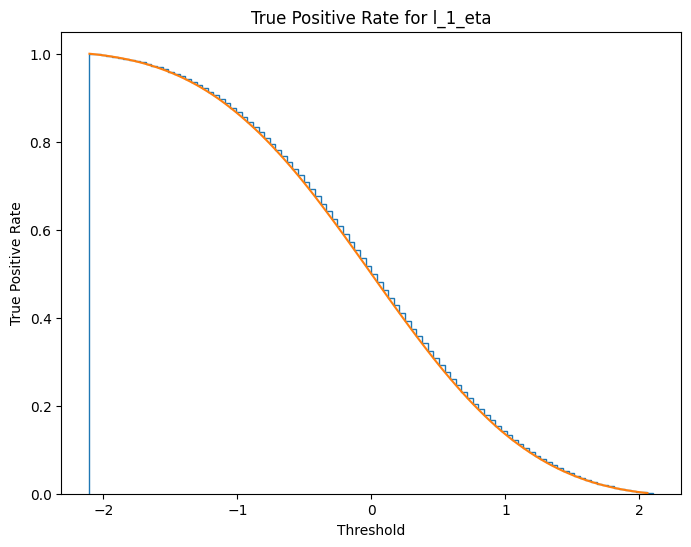

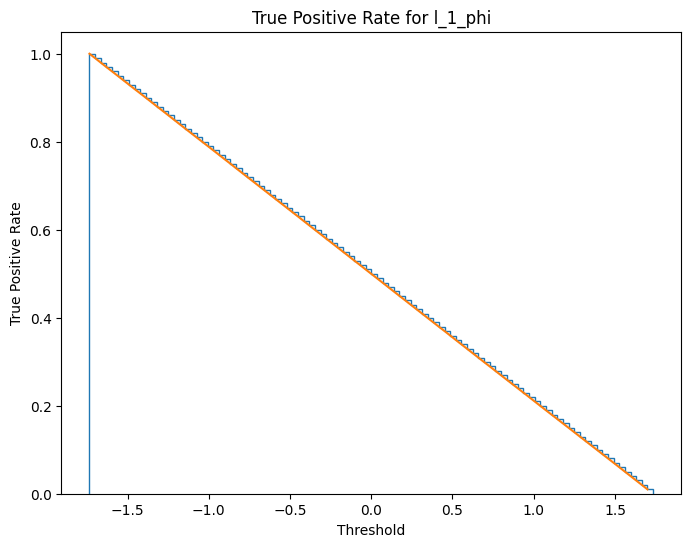

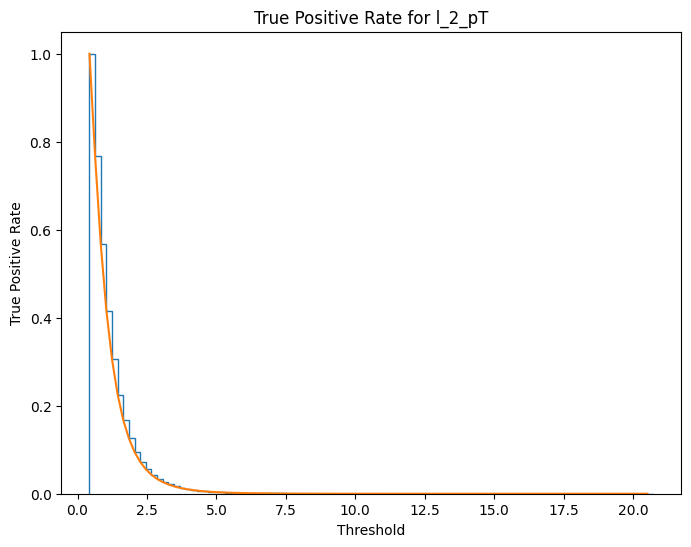

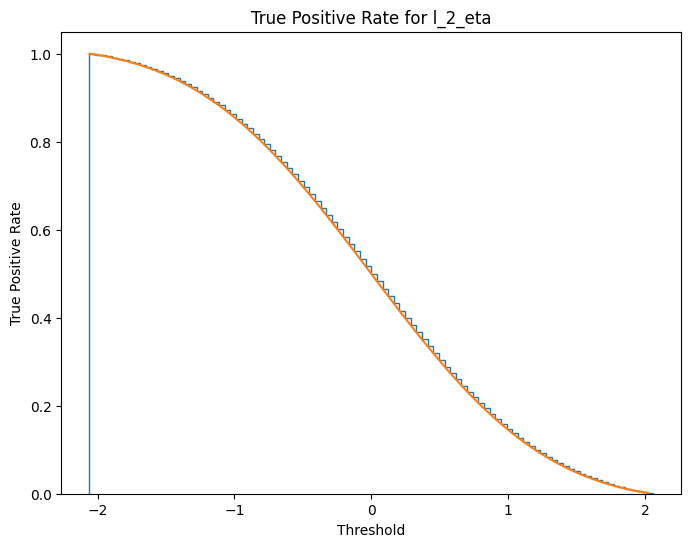

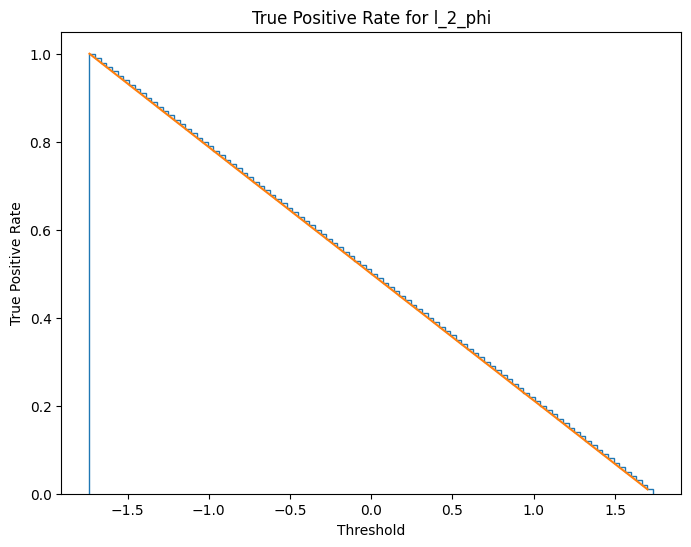

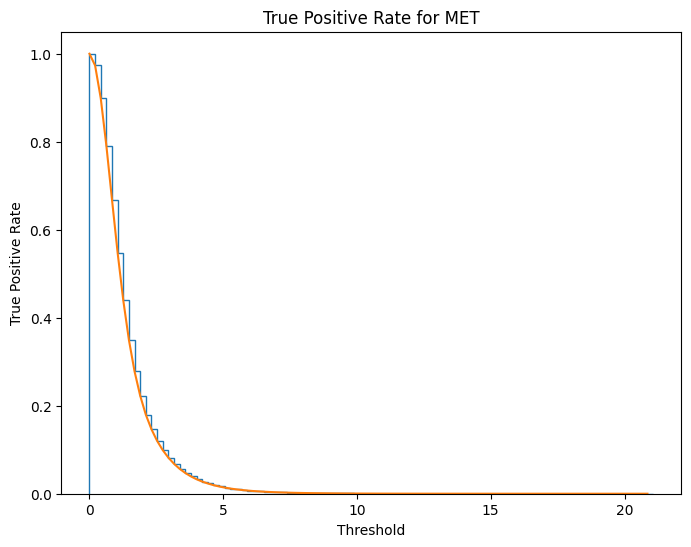

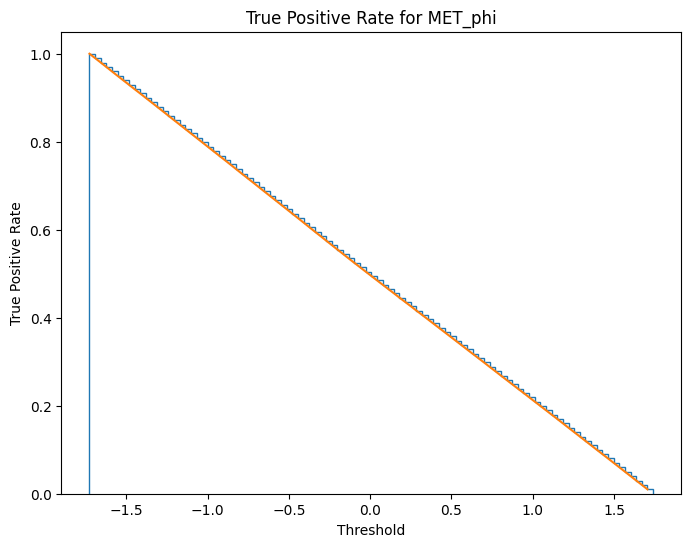

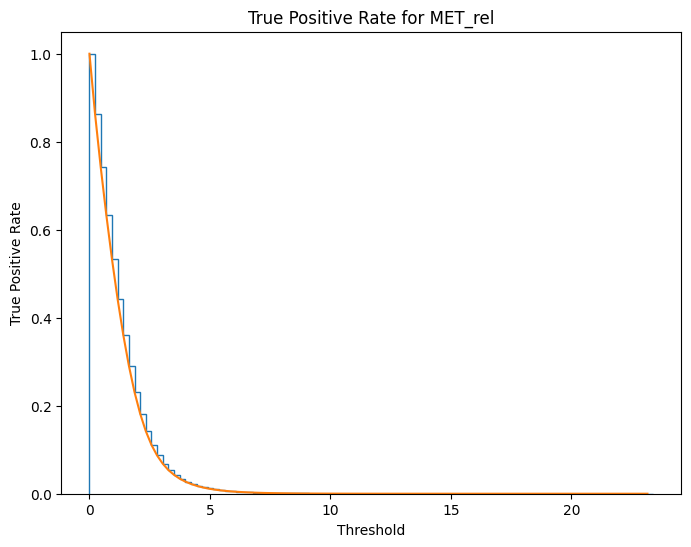

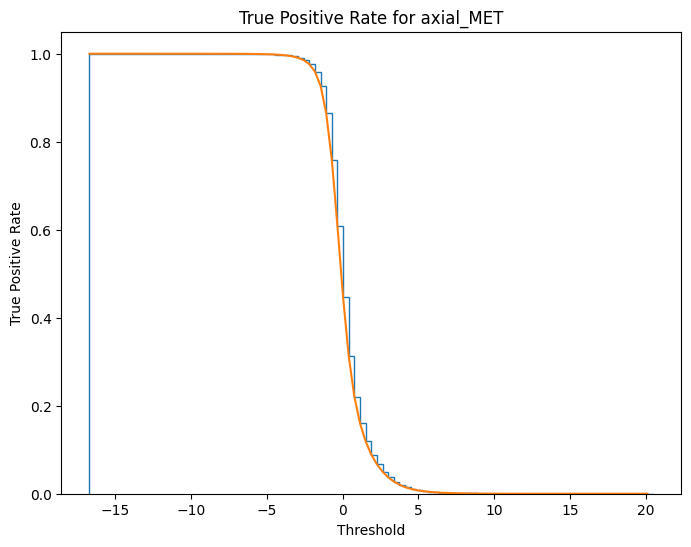

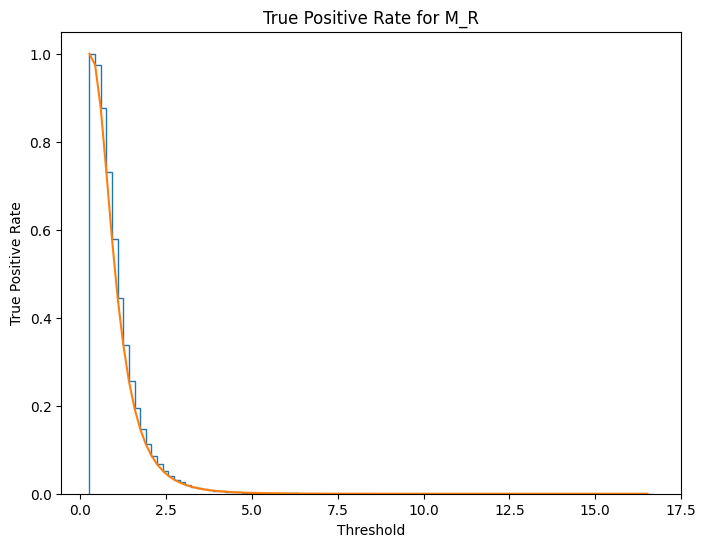

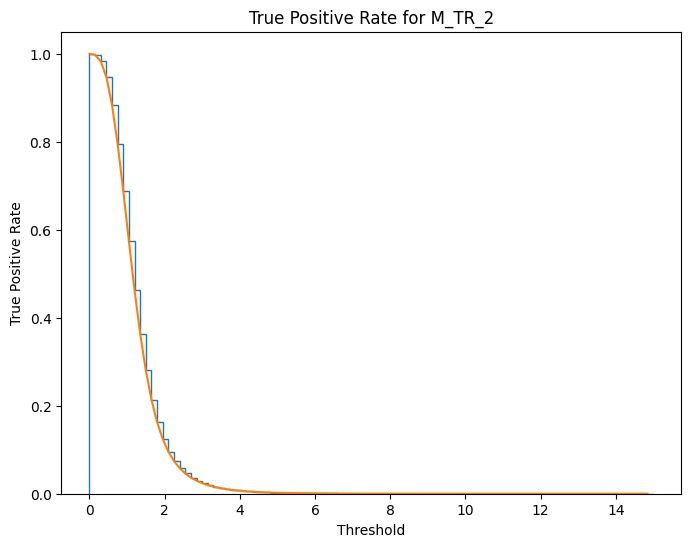

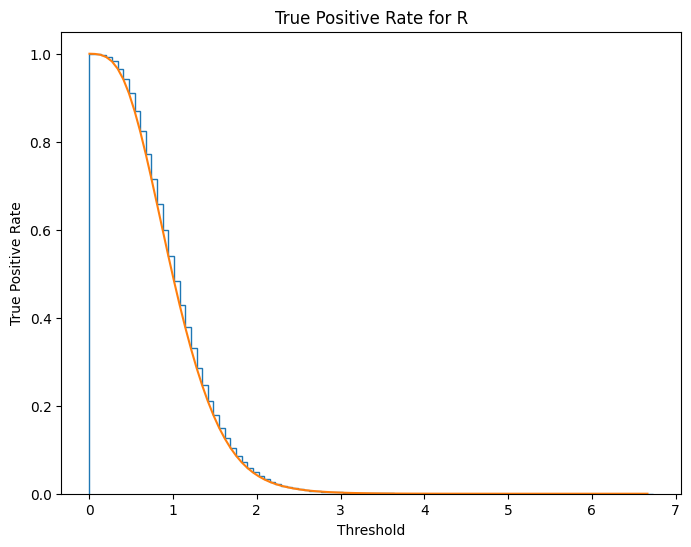

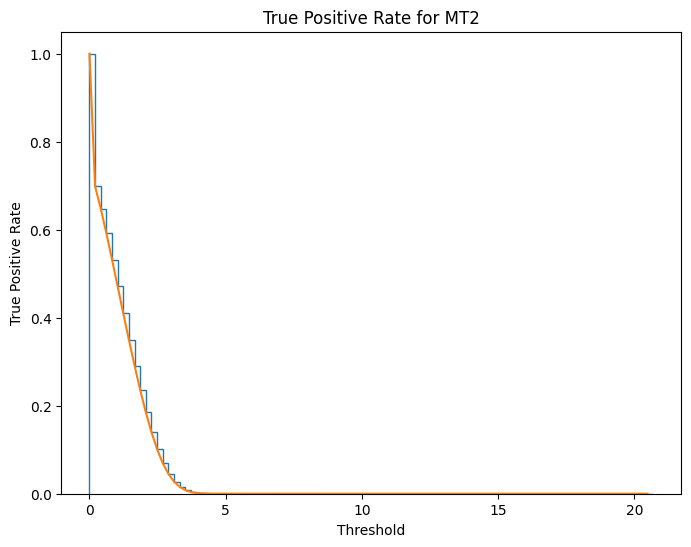

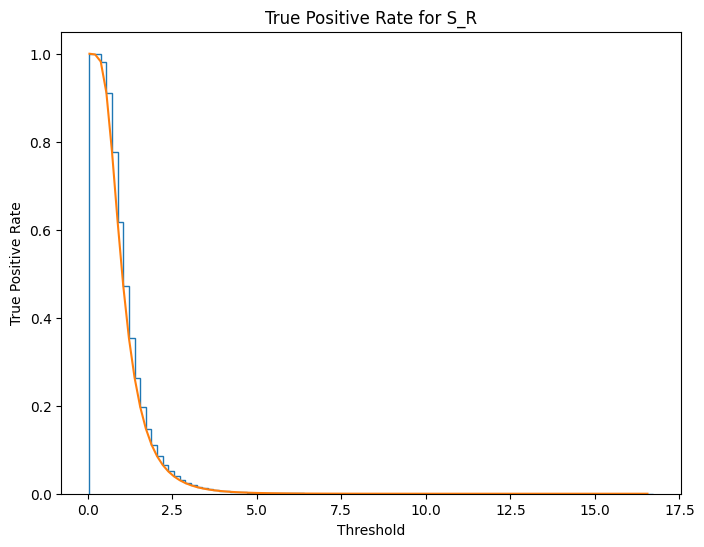

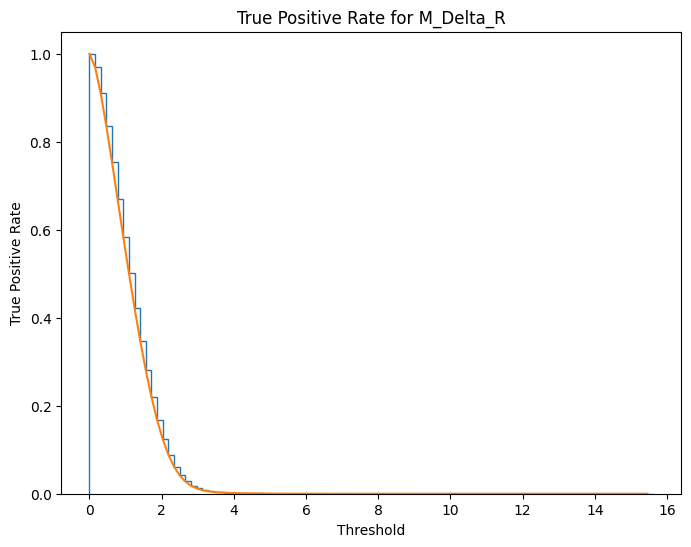

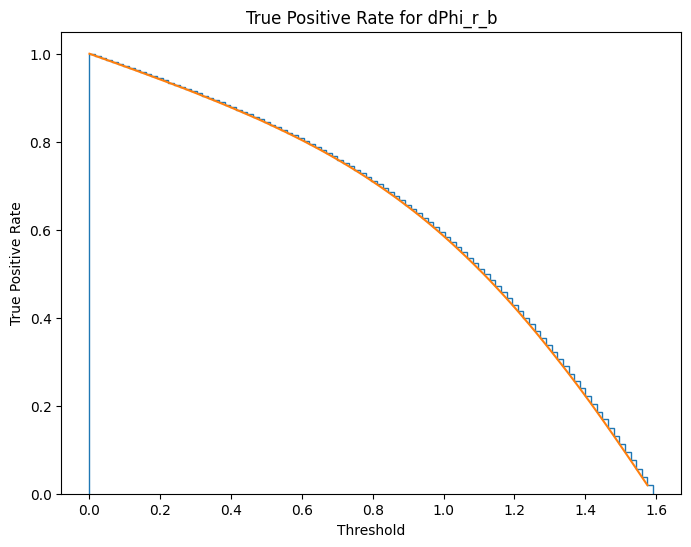

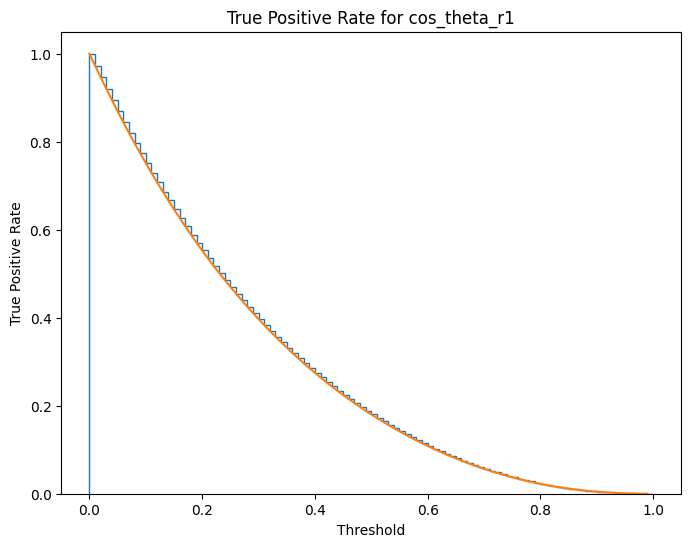

In [27]:
# Exercise 5.2
import matplotlib.pyplot as plt

# Iterate over each column in df_sig
for column in df_sig.columns:
    # Create a new figure for each column
    plt.figure(figsize=(8, 6))
    
    # Compute TPR for the current column
    TPR, bins_sig, _ = plt.hist(df_sig[column], bins=100, histtype="step", cumulative=-1, density=True)
    
    # Plot TPR
    plt.plot(bins_sig[:-1], TPR)
    
    # Add title and labels
    plt.xlabel('Threshold')
    plt.ylabel('True Positive Rate')
    plt.title(f'True Positive Rate for {column}')
    
    plt.grid(False)
    plt.show()

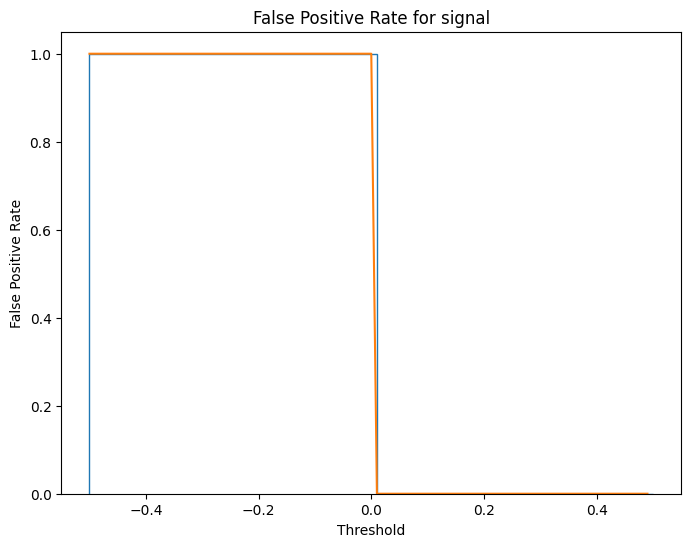

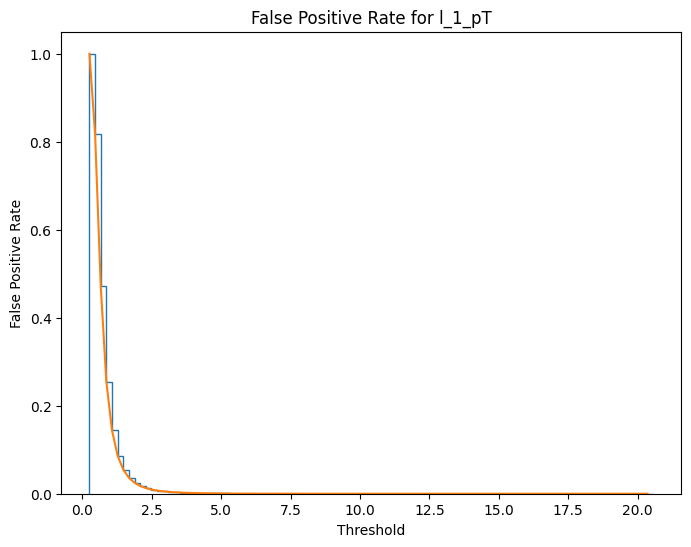

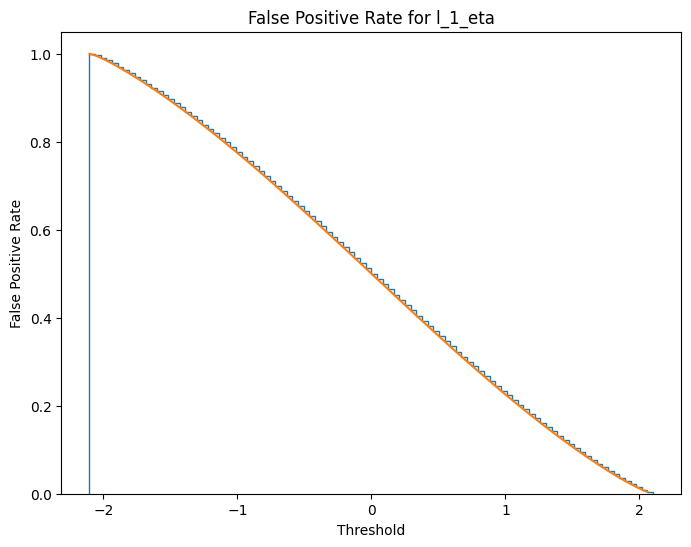

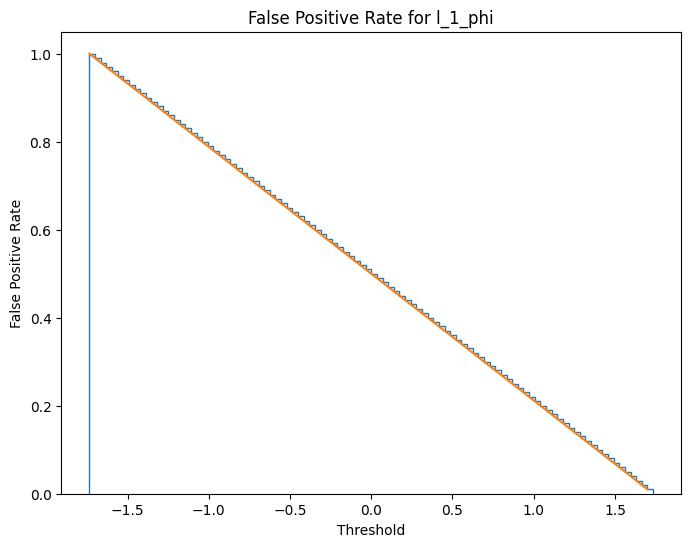

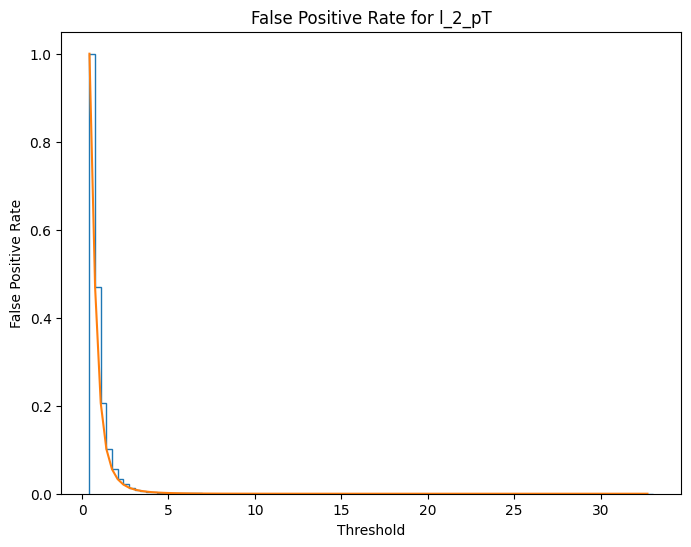

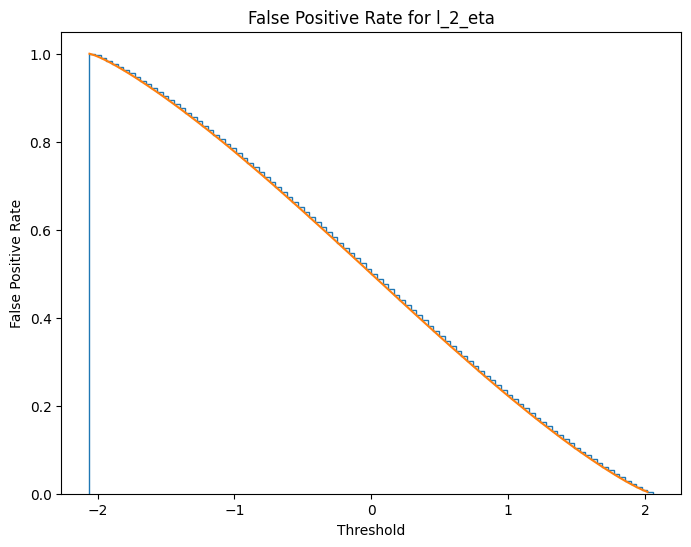

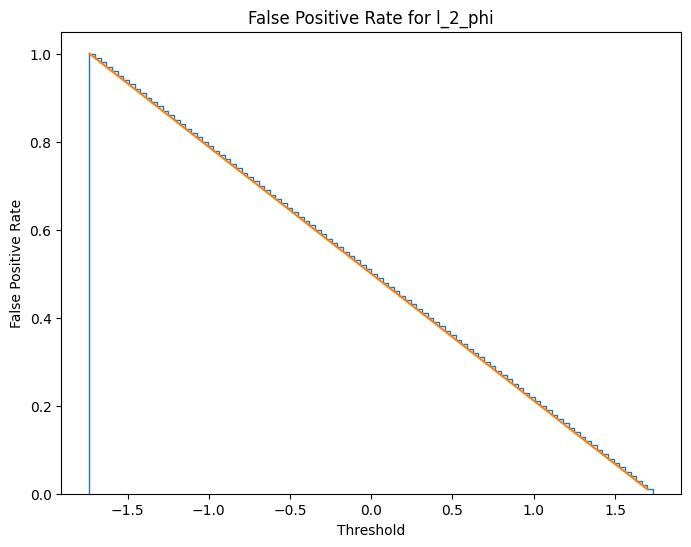

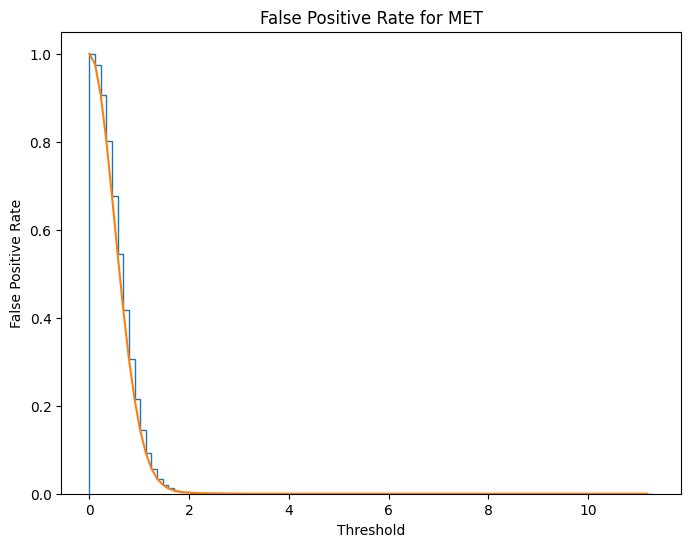

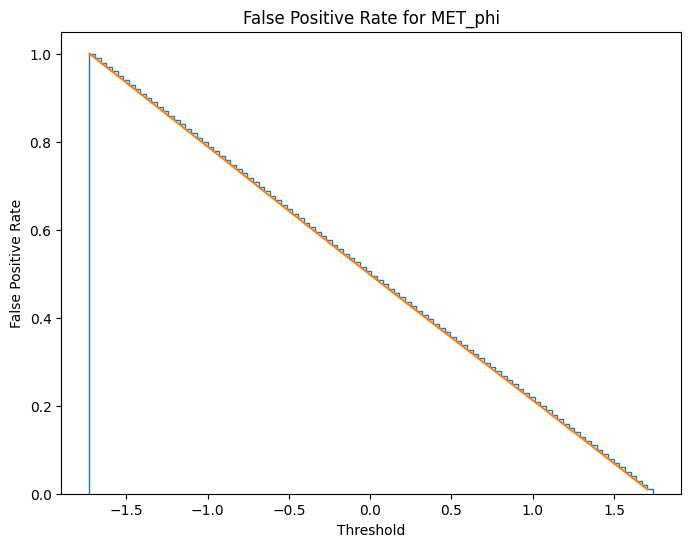

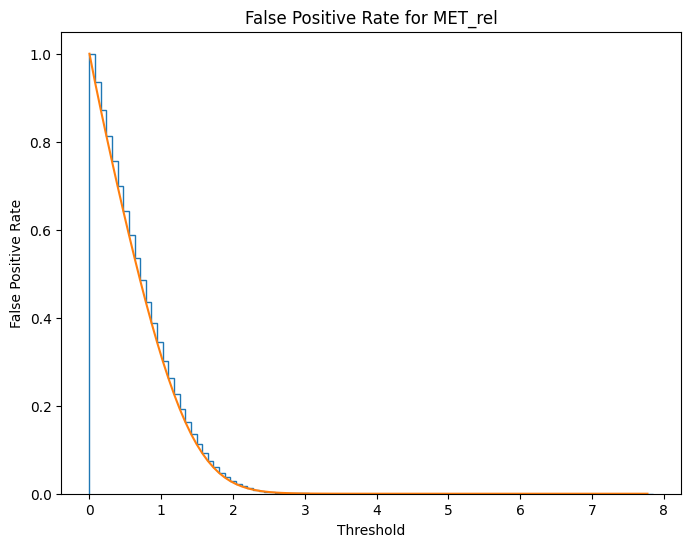

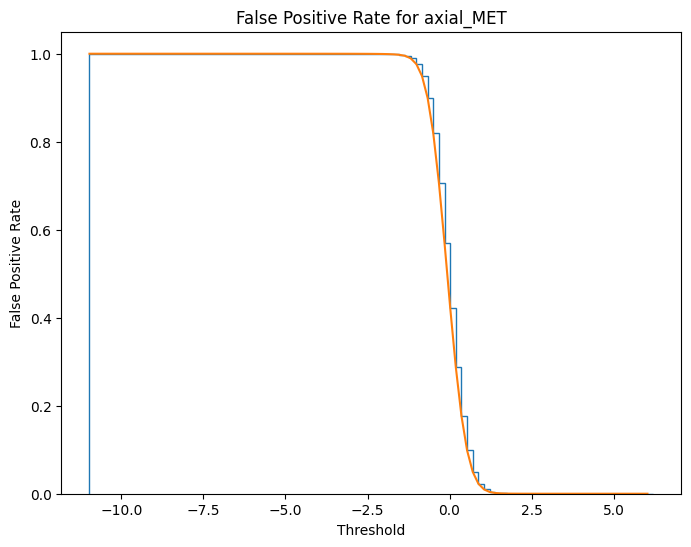

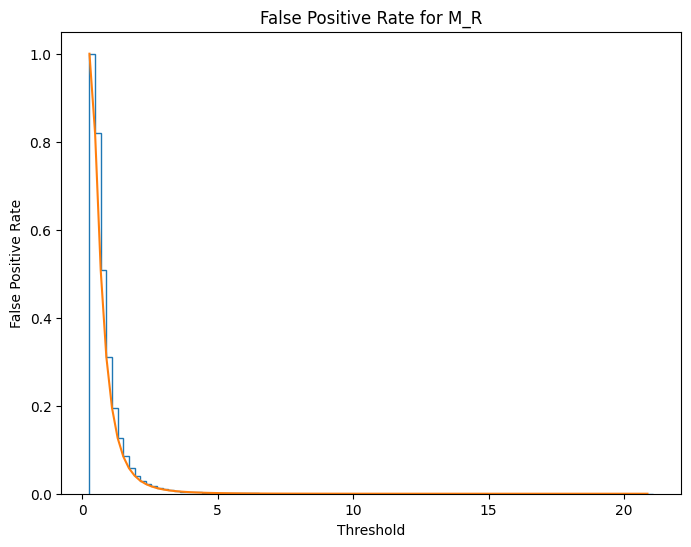

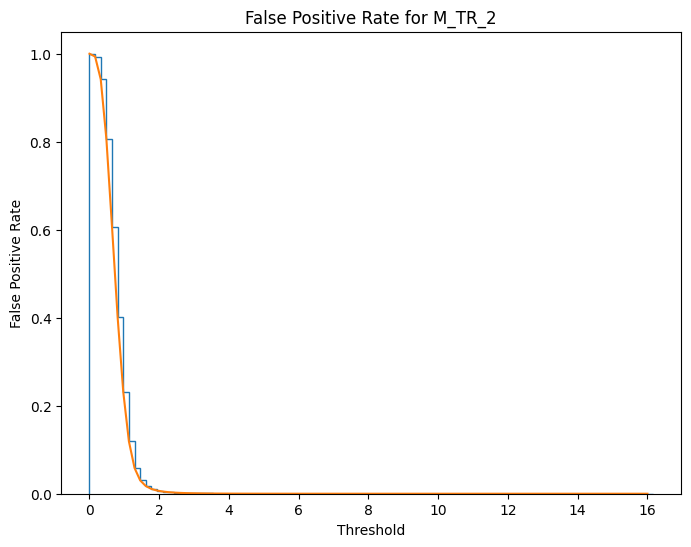

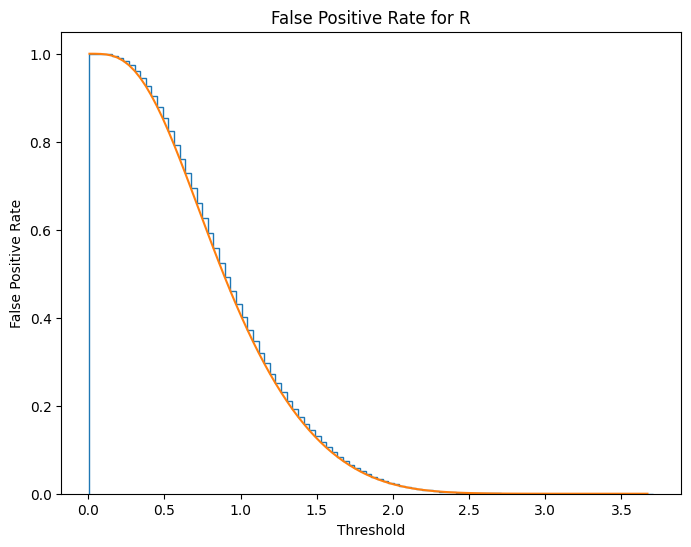

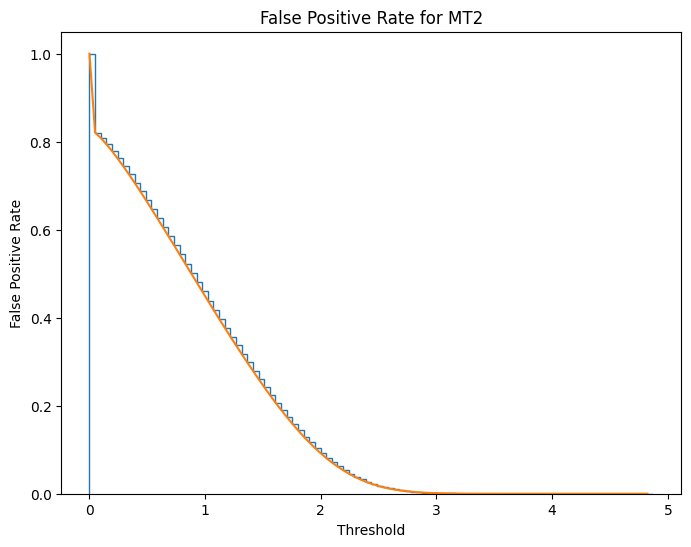

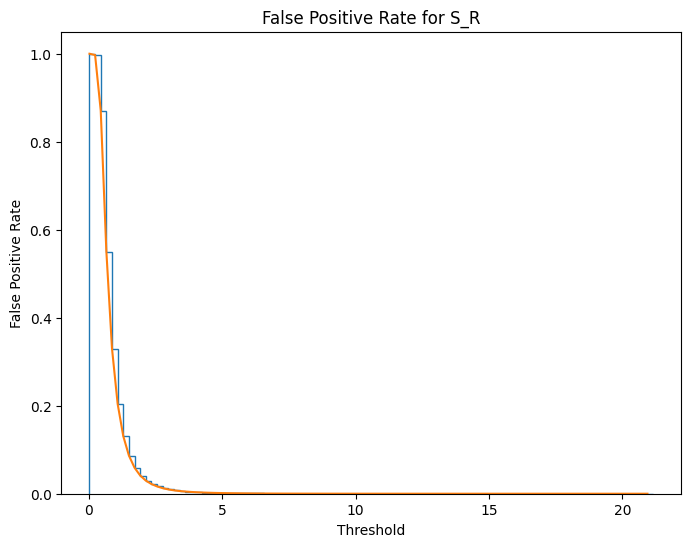

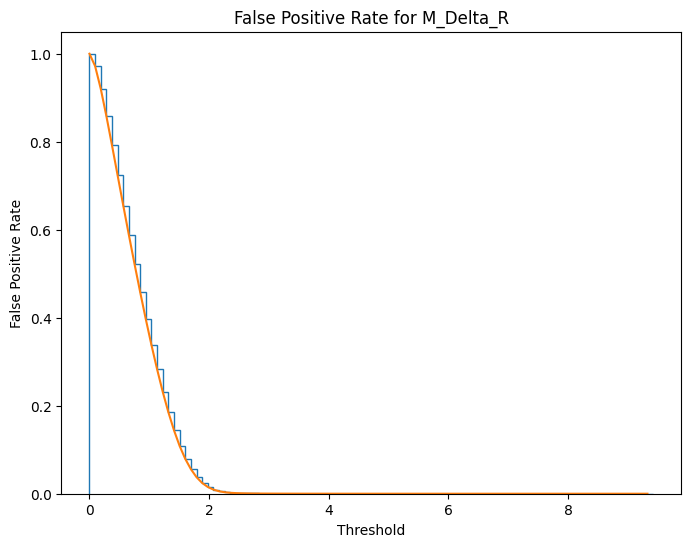

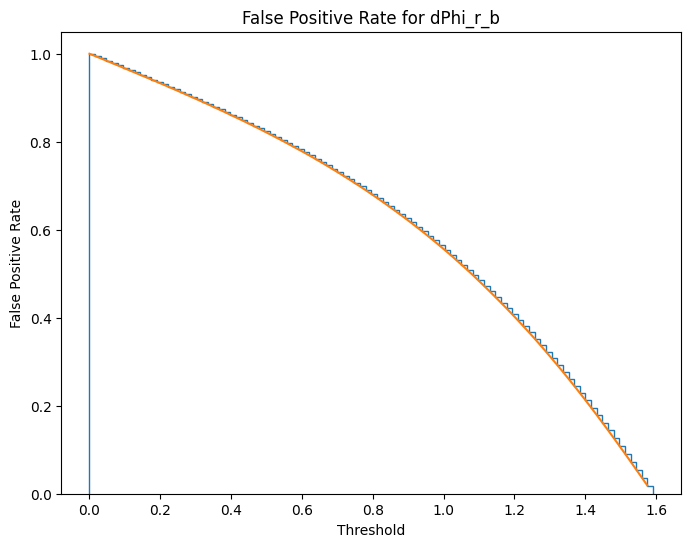

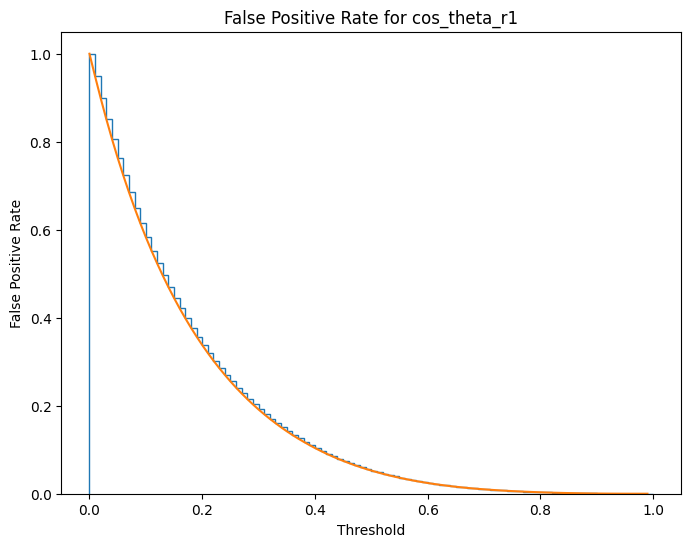

In [28]:
import matplotlib.pyplot as plt

# Iterate over each column in df_bkg
for column in df_bkg.columns:
    # Create a new figure for each column
    plt.figure(figsize=(8, 6))
    
    # Compute FPR for the current column
    FPR, bins_bkg, _ = plt.hist(df_bkg[column], bins=100, histtype="step", cumulative=-1, density=True)
    
    # Plot FPR
    plt.plot(bins_bkg[:-1], FPR)
    
    # Add title and labels
    plt.xlabel('Threshold')
    plt.ylabel('False Positive Rate')
    plt.title(f'False Positive Rate for {column}')
    
    plt.grid(False)
    plt.show()

In [29]:
# Exercise 5.3 
# This function needs to compute the different selection criterias:
# 1. x > x_c
# 2. x < x_c
# 3. |x - \mu| > x_c
# 4. |x - \mu| < x_c

def compute_rate(d,bins=100):
    hist,bins_=np.histogram(d,bins=bins,density=True)
    R = np.cumsum(hist[::-1])[::-1] * (bins_[1]-bins_[0])
    return R,bins_

In [99]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from IPython.display import display, HTML

def compare_significance(df_sig, df_bkg,
                         obs_name,
                         scenarios,bins=100,log=False):
        
    TPR,bins_sig = compute_rate(df_sig[obs_name],bins=bins)
    FPR,bins_sig = compute_rate(df_bkg[obs_name],bins=bins_sig)
    
    max_sigs=dict()
    table=list()
    
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name+" "+str((n_sig_expected, n_bkg_expected)))
    
        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i])
        table.append((name,n_sig_expected, n_bkg_expected, 
                      TPR[max_i],FPR[max_i],
                      n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i],max_i)
        )
    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()
    
    display(HTML(tabulate(table, tablefmt='html',
                                   headers=["Name",'N sig','N bkg',"TPR","FPR","N sig'","N bkg'",'sig','x_c',"bin i"])))
    return max_sigs

signal


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


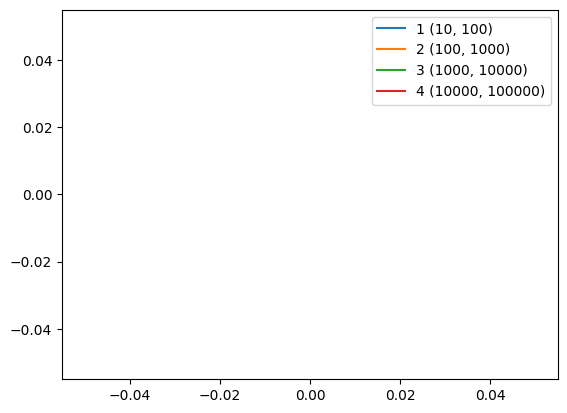

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,nan,10,nan,nan,0.5,0
2,100,1000,1,nan,100,nan,nan,0.5,0
3,1000,10000,1,nan,1000,nan,nan,0.5,0
4,10000,100000,1,nan,10000,nan,nan,0.5,0


l_1_pT


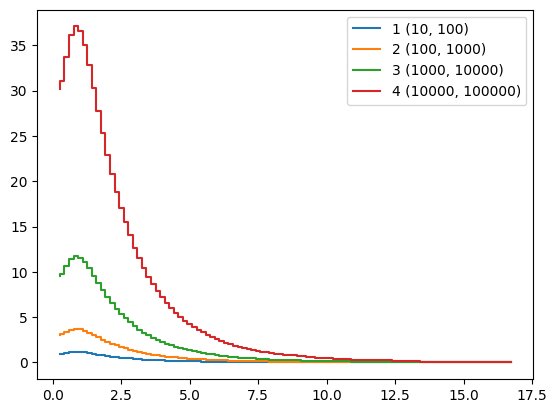

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.617711,0.21567,6.17711,21.567,1.17274,0.920654,4
2,100,1000,0.617711,0.21567,61.7711,215.67,3.70852,0.920654,4
3,1000,10000,0.617711,0.21567,617.711,2156.7,11.7274,0.920654,4
4,10000,100000,0.617711,0.21567,6177.11,21567,37.0852,0.920654,4


l_1_eta


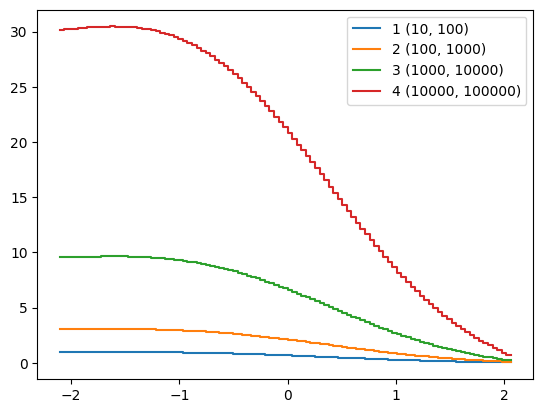

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.968798,0.914216,9.68798,91.4216,0.963468,-1.59838,12
2,100,1000,0.968798,0.914216,96.8798,914.216,3.04675,-1.59838,12
3,1000,10000,0.968798,0.914216,968.798,9142.16,9.63468,-1.59838,12
4,10000,100000,0.968798,0.914216,9687.98,91421.6,30.4675,-1.59838,12


l_1_phi


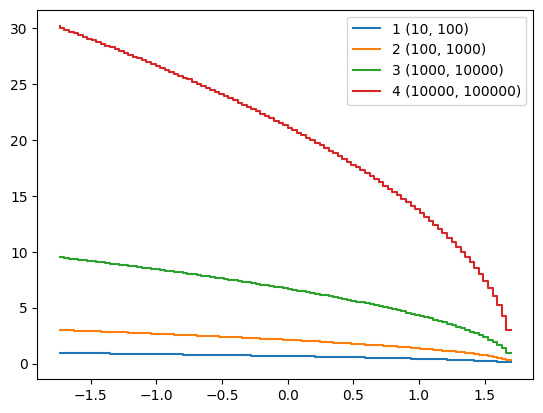

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,-1.73479,0
2,100,1000,1,1,100,1000,3.01511,-1.73479,0
3,1000,10000,1,1,1000,10000,9.53463,-1.73479,0
4,10000,100000,1,1,10000,100000,30.1511,-1.73479,0


l_2_pT


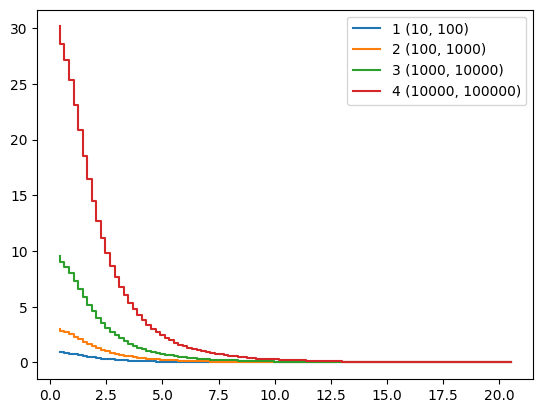

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0.428588,0
2,100,1000,1,1,100,1000,3.01511,0.428588,0
3,1000,10000,1,1,1000,10000,9.53463,0.428588,0
4,10000,100000,1,1,10000,100000,30.1511,0.428588,0


l_2_eta


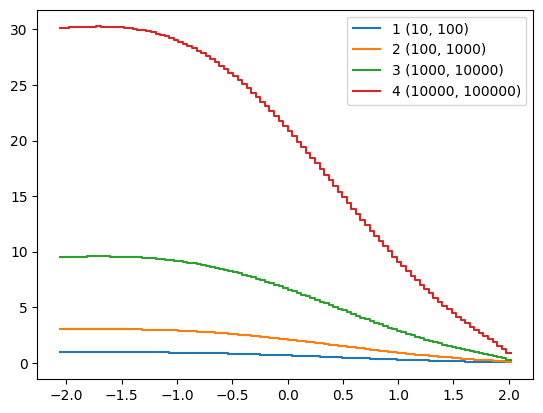

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.97426,0.938731,9.7426,93.8731,0.957111,-1.68859,9
2,100,1000,0.97426,0.938731,97.426,938.731,3.02665,-1.68859,9
3,1000,10000,0.97426,0.938731,974.26,9387.31,9.57111,-1.68859,9
4,10000,100000,0.97426,0.938731,9742.6,93873.1,30.2665,-1.68859,9


l_2_phi


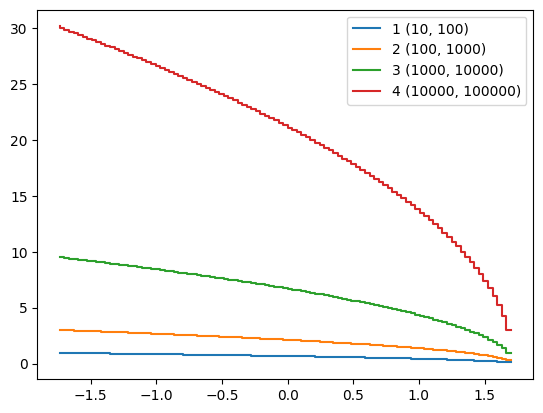

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,-1.7342,0
2,100,1000,1,1,100,1000,3.01511,-1.7342,0
3,1000,10000,1,1,1000,10000,9.53463,-1.7342,0
4,10000,100000,1,1,10000,100000,30.1511,-1.7342,0


MET


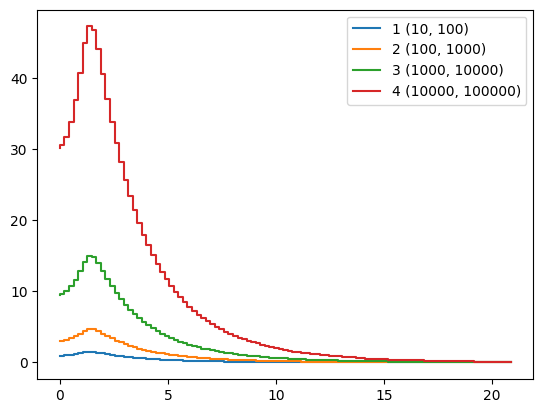

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.349463,0.0198365,3.49463,1.98365,1.49307,1.47506,7
2,100,1000,0.349463,0.0198365,34.9463,19.8365,4.72149,1.47506,7
3,1000,10000,0.349463,0.0198365,349.463,198.365,14.9307,1.47506,7
4,10000,100000,0.349463,0.0198365,3494.63,1983.65,47.2149,1.47506,7


MET_phi


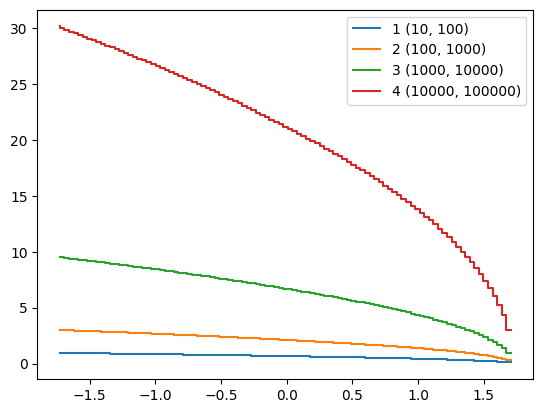

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,-1.72712,0
2,100,1000,1,1,100,1000,3.01511,-1.72712,0
3,1000,10000,1,1,1000,10000,9.53463,-1.72712,0
4,10000,100000,1,1,10000,100000,30.1511,-1.72712,0


MET_rel


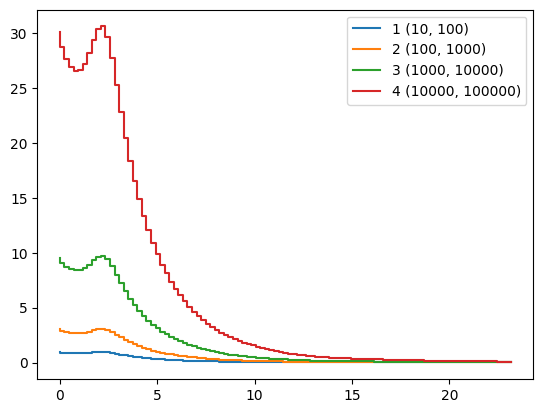

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.142159,0.00731554,1.42159,0.731554,0.96881,2.33864,10
2,100,1000,0.142159,0.00731554,14.2159,7.31554,3.06365,2.33864,10
3,1000,10000,0.142159,0.00731554,142.159,73.1554,9.6881,2.33864,10
4,10000,100000,0.142159,0.00731554,1421.59,731.554,30.6365,2.33864,10


axial_MET


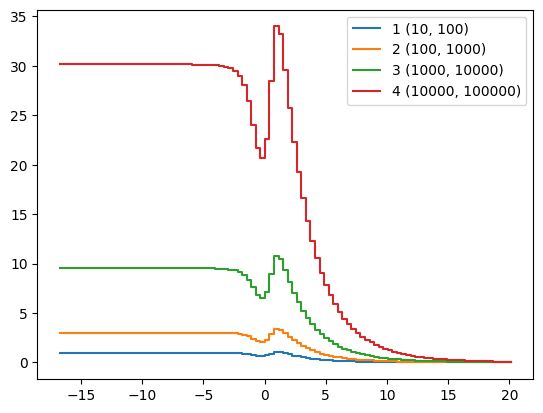

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.160196,0.00620536,1.60196,0.620536,1.07456,1.1405,48
2,100,1000,0.160196,0.00620536,16.0196,6.20536,3.39806,1.1405,48
3,1000,10000,0.160196,0.00620536,160.196,62.0536,10.7456,1.1405,48
4,10000,100000,0.160196,0.00620536,1601.96,620.536,33.9806,1.1405,48


M_R


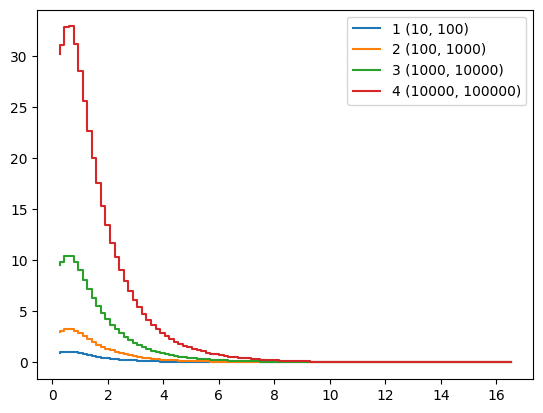

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.731022,0.421495,7.31022,42.1495,1.03945,0.76074,3
2,100,1000,0.731022,0.421495,73.1022,421.495,3.28704,0.76074,3
3,1000,10000,0.731022,0.421495,731.022,4214.95,10.3945,0.76074,3
4,10000,100000,0.731022,0.421495,7310.22,42149.5,32.8704,0.76074,3


M_TR_2


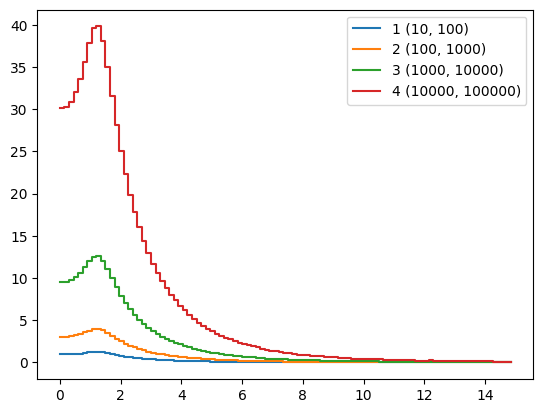

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.363213,0.0469801,3.63213,4.69801,1.25845,1.35029,9
2,100,1000,0.363213,0.0469801,36.3213,46.9801,3.97956,1.35029,9
3,1000,10000,0.363213,0.0469801,363.213,469.801,12.5845,1.35029,9
4,10000,100000,0.363213,0.0469801,3632.13,4698.01,39.7956,1.35029,9


R


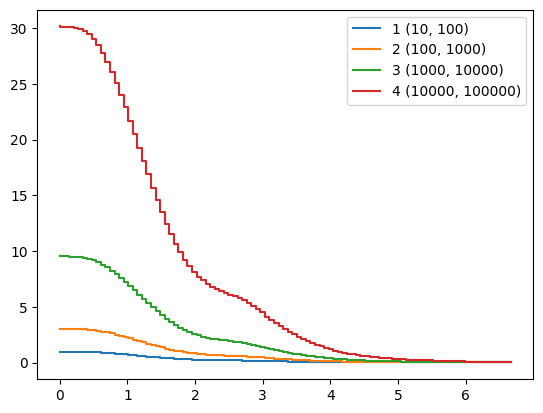

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0.00204808,0
2,100,1000,1,1,100,1000,3.01511,0.00204808,0
3,1000,10000,1,1,1000,10000,9.53463,0.00204808,0
4,10000,100000,1,1,10000,100000,30.1511,0.00204808,0


MT2


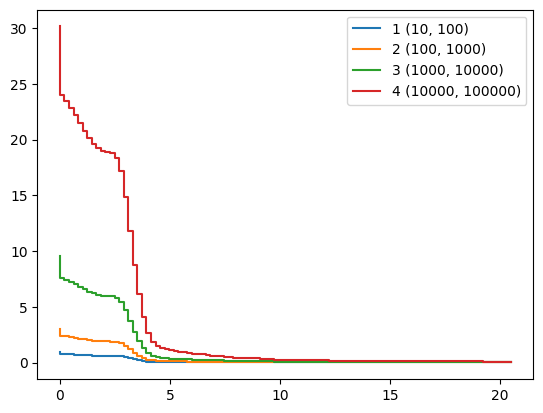

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0,0
2,100,1000,1,1,100,1000,3.01511,0,0
3,1000,10000,1,1,1000,10000,9.53463,0,0
4,10000,100000,1,1,10000,100000,30.1511,0,0


S_R


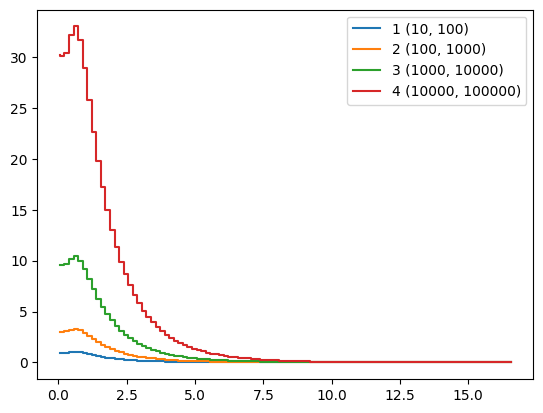

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.777207,0.477283,7.77207,47.7283,1.04325,0.719131,4
2,100,1000,0.777207,0.477283,77.7207,477.283,3.29905,0.719131,4
3,1000,10000,0.777207,0.477283,777.207,4772.83,10.4325,0.719131,4
4,10000,100000,0.777207,0.477283,7772.07,47728.3,32.9905,0.719131,4


M_Delta_R


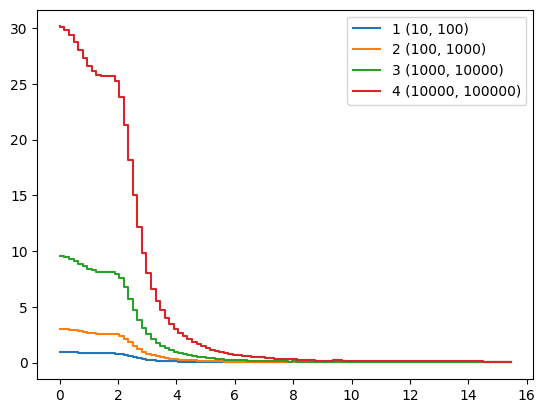

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0.00445562,0
2,100,1000,1,1,100,1000,3.01511,0.00445562,0
3,1000,10000,1,1,1000,10000,9.53463,0.00445562,0
4,10000,100000,1,1,10000,100000,30.1511,0.00445562,0


dPhi_r_b


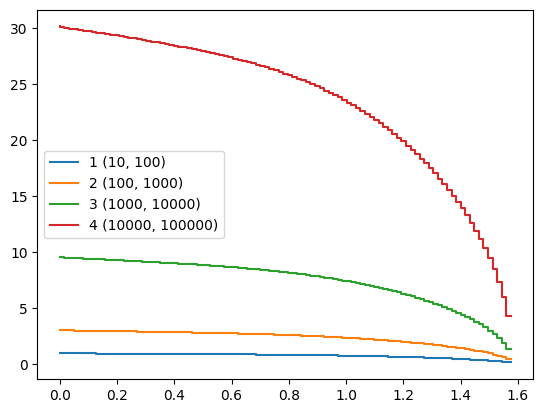

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,2.45273e-06,0
2,100,1000,1,1,100,1000,3.01511,2.45273e-06,0
3,1000,10000,1,1,1000,10000,9.53463,2.45273e-06,0
4,10000,100000,1,1,10000,100000,30.1511,2.45273e-06,0


cos_theta_r1


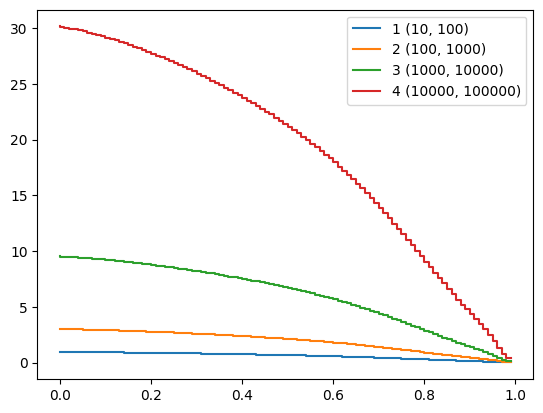

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,1.50257e-07,0
2,100,1000,1,1,100,1000,3.01511,1.50257e-07,0
3,1000,10000,1,1,1000,10000,9.53463,1.50257e-07,0
4,10000,100000,1,1,10000,100000,30.1511,1.50257e-07,0


In [100]:
scenarios = { "1": (10,100), 
              "2": (100,1000),
              "3": (1000,10000),
              "4": (10000,100000)
            }
my_obs= ['signal',
 'l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi',
 'MET_rel',
 'axial_MET',
 'M_R',
 'M_TR_2',
 'R',
 'MT2',
 'S_R',
 'M_Delta_R',
 'dPhi_r_b',
 'cos_theta_r1']

for obs in my_obs:
    print(obs)
    _=compare_significance(df_sig,df_bkg,obs,scenarios)

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [33]:
# Exercise 6.1
# l_1_pT, x_c = 0.920654
#l_2_pT, x_c = 0.428588
# MET, x_c = 1.47506

In [34]:
# Exercise 6.2
# l_1_pT
TPR_1=sum(df_sig["l_1_pT"]>0.920654)/df_sig.shape[0]
FPR_1=sum(df_bkg["l_1_pT"]>0.920654)/df_bkg.shape[0]

print("\nl_1_pT:")
print(TPR_1)
print(FPR_1)

# l_2_pT
TPR_2=sum(df_sig["l_2_pT"]>0.428588)/df_sig.shape[0]
FPR_2=sum(df_bkg["l_2_pT"]>0.428588)/df_bkg.shape[0]

print("\nl_2_pT:")
print(TPR_2)
print(FPR_2)

# MET
TPR_3=sum(df_sig["MET"]>1.47506)/df_sig.shape[0]
FPR_3=sum(df_bkg["MET"]>1.47506)/df_bkg.shape[0]

print("\nMET:")
print(TPR_3)
print(FPR_3)


l_1_pT:
0.617711041962526
0.2156709767407905

l_2_pT:
1.0
0.9999981564597834

MET:
0.349463049435119
0.01983649273110528


In [35]:
TPR_1_2_3=sum(np.logical_and(df_sig["l_1_pT"]>0.920654, df_sig["l_2_pT"]>0.428588, df_sig["MET"]>1.47506))/df_sig.shape[0]
FPR_1_2_3=sum(np.logical_and(df_bkg["l_1_pT"]>0.920654, df_bkg["l_2_pT"]>0.428588, df_bkg["MET"]>1.47506))/df_bkg.shape[0]

print(TPR_1_2_3)
print(FPR_1_2_3)

0.617711041962526
0.2156709767407905


In [36]:
display(HTML(tabulate([[ TPR_1, TPR_2, TPR_3, TPR_1*TPR_2*TPR_3, TPR_1_2_3],
                                 [FPR_1, FPR_2, FPR_3, FPR_1*FPR_2*FPR_3, FPR_1_2_3]],
                               tablefmt='html',
                               headers=["Cut 1",'Cut 2','Cut 3', 'Cut 1 * Cut 2 * Cut 3','Cut 1, Cut 2, & Cut 3'])))

Cut 1,Cut 2,Cut 3,Cut 1 * Cut 2 * Cut 3,"Cut 1, Cut 2, & Cut 3"
0.617711,1,0.349463,0.215867,0.617711
0.215671,0.999998,0.0198365,0.00427815,0.215671


In [37]:
# Exercise 6.3
# l_1_pT
TPR_1=sum(df_sig["l_1_pT"]>0.920654)/df_sig.shape[0]
FPR_1=sum(df_bkg["l_1_pT"]>0.920654)/df_bkg.shape[0]

print("\nl_1_pT:")
print(TPR_1)
print(FPR_1)

# M_TR_2 - 2nd variable to test
TPR_4=sum(df_sig["M_TR_2"]>1.35029)/df_sig.shape[0]
FPR_4=sum(df_bkg["M_TR_2"]>1.35029)/df_bkg.shape[0]

print("\nM_TR_2:")
print(TPR_4)
print(FPR_4)


l_1_pT:
0.617711041962526
0.2156709767407905

M_TR_2:
0.3632149633691708
0.04698077888099321


In [38]:
TPR_1_4=sum(np.logical_and(df_sig["l_1_pT"]>0.920654, df_sig["M_TR_2"]>1.35029))/df_sig.shape[0]
FPR_1_4=sum(np.logical_and(df_bkg["l_1_pT"]>0.920654, df_bkg["M_TR_2"]>1.35029))/df_bkg.shape[0]

print(TPR_1_4)
print(FPR_1_4)

0.31885278038942627
0.04125511167613571


In [39]:
TPR_4_1=sum(np.logical_and(df_sig["M_TR_2"]>1.35029, df_sig["l_1_pT"]>0.920654))/df_sig.shape[0]
FPR_4_1=sum(np.logical_and(df_bkg["M_TR_2"]>1.35029, df_bkg["l_1_pT"]>0.920654))/df_bkg.shape[0]

print(TPR_4_1)
print(FPR_4_1)

0.31885278038942627
0.04125511167613571


In [40]:
display(HTML(tabulate([[ TPR_1, TPR_4, TPR_1*TPR_4, TPR_1_4],
                                 [FPR_1, FPR_4, FPR_1*FPR_4, FPR_1_4]],
                               tablefmt='html',
                               headers=["Cut 1",'Cut 2','Cut 1 * Cut 4','Cut 1 & Cut 4'])))

Cut 1,Cut 2,Cut 1 * Cut 4,Cut 1 & Cut 4
0.617711,0.363215,0.224362,0.318853
0.215671,0.0469808,0.0101324,0.0412551


## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



In [41]:
# Exercise 7.1: l_1_pT, l_2_pT, MET
def compute_rate(d,bins=100):
    hist,bins_=np.histogram(d,bins=bins,density=True)
    R = np.cumsum(hist[::-1])[::-1] * (bins_[1]-bins_[0])
    return R,bins_

# AUC function
def AUC(TPR, FPR):
    n = FPR.shape[0]
    return np.sum((FPR[0:n - 1] - FPR[1:]) * (TPR[0:n - 1] + TPR[1:]) / 2)

In [42]:
# l_1_pT
TPR,bins=compute_rate(df_sig["l_1_pT"])
FPR,bins=compute_rate(df_bkg["l_1_pT"],bins=bins)

# l_2_pT
TPR2,bins=compute_rate(df_sig["l_2_pT"])
FPR2,bins=compute_rate(df_bkg["l_2_pT"])

# MET
TPR3,bins=compute_rate(df_sig["MET"])
FPR3,bins=compute_rate(df_bkg["MET"])

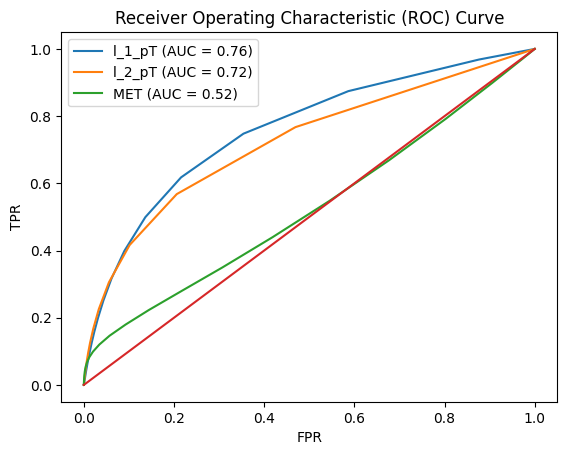

In [43]:
plt.plot(FPR,TPR, label=f'l_1_pT (AUC = {AUC(TPR, FPR):.2f})')
plt.plot(FPR2,TPR2, label=f'l_2_pT (AUC = {AUC(TPR2, FPR2):.2f})')
plt.plot(FPR3,TPR3, label=f'MET (AUC = {AUC(TPR3, FPR3):.2f})')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.plot([0,1],[0,1])

In [44]:
# Exercise 7.2
import numpy as np
import matplotlib.pyplot as plt

def plot_roc_curves(df_sig, df_bkg, observable_names, selections=None, bins=100):
    # Create a plot
    plt.figure()

    # Iterate over observable names
    for obs_name in observable_names:
        # Apply selections if provided
        if selections and obs_name in selections:
            selection = selections[obs_name]
            df_sig_selected = df_sig[df_sig[obs_name] > selection['cut']]
            df_bkg_selected = df_bkg[df_bkg[obs_name] > selection['cut']]
        else:
            df_sig_selected = df_sig
            df_bkg_selected = df_bkg

        # Compute TPR and FPR
        TPR, bins = compute_rate(df_sig_selected[obs_name], bins=bins)
        FPR, bins = compute_rate(df_bkg_selected[obs_name], bins=bins)

        # Plot ROC curve
        plt.plot(FPR, TPR, label=f'{obs_name} (AUC = {AUC(TPR, FPR):.2f})')

    # Plot the diagonal line (random classifier)
    plt.plot([0, 1], [0, 1])

    # Add labels and legend
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()

    # Show the plot
    plt.show()

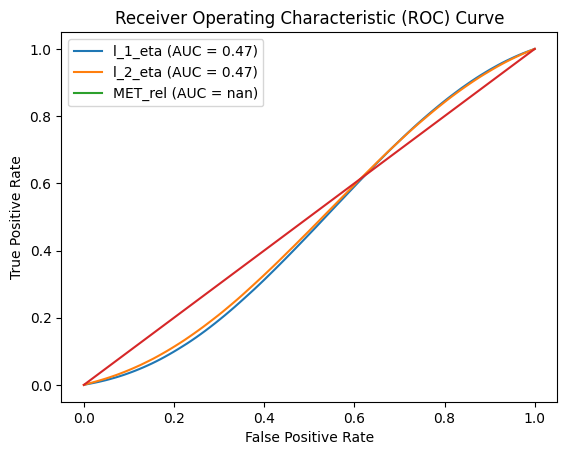

In [45]:
# Example usage:
observable_names = ['l_1_eta', 'l_2_eta', 'MET_rel']
selections = {'l_1_eta': {'cut': -1.59838}, 'l_2_eta': {'cut': -1.68859}, 'MET_rel': {'cut': 2.33864}}
plot_roc_curves(df_sig, df_bkg, observable_names, selections)

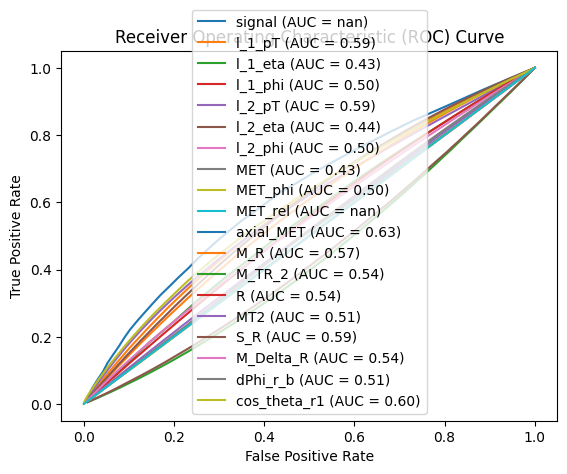

In [105]:
# Exercise 7.3
observable_names = ["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", 
                    "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
selections = {'signal': {'cut': 0.5}, 'l_1_pT': {'cut': 0.920654}, 'l_1_eta': {'cut': -1.59838}, 'l_1_phi': {'cut': -1.73479}, 
              'l_2_pT': {'cut': 0.428588}, 'l_2_eta': {'cut': -1.68859}, 'l_2_phi': {'cut': -1.7342}, 'MET': {'cut': 1.47506}, 
              'MET_phi': {'cut': -1.72712}, 'MET_rel': {'cut': 2.33864}, 'axial_MET': {'cut': 1.1405}, 'M_R': {'cut': 0.76074}, 
              'M_TR_2': {'cut': 1.35029}, 'R': {'cut': 0.00204808}, 'MT2': {'cut': 0}, 'S_R': {'cut': 0.719131},
              'M_Delta_R': {'cut': 	0.00445562}, 'dPhi_r_b': {'cut': 2.45273e-06}, 'cos_theta_r1': {'cut': 1.50257e-07}}
plot_roc_curves(df_sig, df_bkg, observable_names, selections)

## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 

In [47]:
# Exercise 8
df_sig.shape

(2287827, 19)

In [48]:
df_sig

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
8,1.0,2.112812,0.742983,-0.330539,0.805253,-0.028887,-1.446679,2.299946,1.450429,2.989110,-1.894770,1.445125,2.548166,1.564721,2.393632,1.554566,2.148468,1.179117,0.688057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999986,1.0,0.951119,-1.025120,0.735755,1.072442,-1.268414,-1.365378,0.496042,-1.378751,0.027446,0.241199,0.841212,0.726010,0.765865,0.000000,0.816827,0.300119,0.758559,0.259673
4999988,1.0,2.039801,0.851302,0.125229,0.934144,0.551678,-0.811299,1.602762,-0.852513,0.209035,0.412390,1.370954,1.584090,1.025354,0.202440,1.102830,0.605197,0.739403,0.612186
4999991,1.0,1.031701,0.648011,-1.616710,0.532912,1.663047,-1.243807,0.706740,0.189915,0.433557,-0.393302,0.809631,1.087218,1.191645,1.972363,0.698013,1.564201,0.035361,0.504437
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599


In [49]:
df_sig_0 = df_sig.drop("signal",axis=1)
df_bkg_0 = df_bkg.drop("signal",axis=1)

df_sig_0

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
8,2.112812,0.742983,-0.330539,0.805253,-0.028887,-1.446679,2.299946,1.450429,2.989110,-1.894770,1.445125,2.548166,1.564721,2.393632,1.554566,2.148468,1.179117,0.688057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999986,0.951119,-1.025120,0.735755,1.072442,-1.268414,-1.365378,0.496042,-1.378751,0.027446,0.241199,0.841212,0.726010,0.765865,0.000000,0.816827,0.300119,0.758559,0.259673
4999988,2.039801,0.851302,0.125229,0.934144,0.551678,-0.811299,1.602762,-0.852513,0.209035,0.412390,1.370954,1.584090,1.025354,0.202440,1.102830,0.605197,0.739403,0.612186
4999991,1.031701,0.648011,-1.616710,0.532912,1.663047,-1.243807,0.706740,0.189915,0.433557,-0.393302,0.809631,1.087218,1.191645,1.972363,0.698013,1.564201,0.035361,0.504437
4999995,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599


In [50]:
# mean of each feature over signal
m_s= np.mean(df_sig_0,axis=0)
m_s

l_1_pT          1.290233
l_1_eta        -0.000336
l_1_phi        -0.000553
l_2_pT          1.138185
l_2_eta         0.000378
l_2_phi        -0.000128
MET             1.417029
MET_phi         0.000155
MET_rel         1.275509
axial_MET       0.084007
M_R             1.182889
M_TR_2          1.268996
R               1.057301
MT2             1.074723
S_R             1.174697
M_Delta_R       1.185596
dPhi_r_b        1.014991
cos_theta_r1    0.282560
dtype: float64

In [51]:
# compute delta
m_s= np.mean(df_sig_0,axis=0)
m_b= np.mean(df_bkg_0,axis=0)

delta = m_s-m_b
delta

l_1_pT          0.534471
l_1_eta        -0.000660
l_1_phi        -0.000928
l_2_pT          0.255800
l_2_eta         0.000765
l_2_phi        -0.000199
MET             0.768856
MET_phi         0.000220
MET_rel         0.505262
axial_MET       0.154960
M_R             0.336500
M_TR_2          0.495985
R               0.105791
MT2             0.136978
S_R             0.321855
M_Delta_R       0.341800
dPhi_r_b        0.028585
cos_theta_r1    0.106272
dtype: float64

In [52]:
delta=np.matrix(m_s-m_b).transpose()

In [53]:
# Calculate S_B
S_B= delta*delta.transpose()
S_B

matrix([[ 2.85659103e-01, -3.52809644e-04, -4.96156489e-04,
          1.36717519e-01,  4.08806287e-04, -1.06310408e-04,
          4.10931386e-01,  1.17828594e-04,  2.70047689e-01,
          8.28218385e-02,  1.79849669e-01,  2.65089747e-01,
          5.65419449e-02,  7.32109964e-02,  1.72022353e-01,
          1.82682327e-01,  1.52779431e-02,  5.67995029e-02],
        [-3.52809644e-04,  4.35745417e-07,  6.12789134e-07,
         -1.68856020e-04, -5.04905320e-07,  1.31301040e-07,
         -5.07529970e-04, -1.45526832e-07, -3.33528420e-04,
         -1.02290958e-04, -2.22127344e-04, -3.27405003e-04,
         -6.98333898e-05, -9.04208734e-05, -2.12460043e-04,
         -2.25625882e-04, -1.88693643e-05, -7.01514925e-05],
        [-4.96156489e-04,  6.12789134e-07,  8.61765858e-07,
         -2.37462358e-04, -7.10048762e-07,  1.84648760e-07,
         -7.13739809e-04, -2.04654502e-07, -4.69041288e-04,
         -1.43851858e-04, -3.12377864e-04, -4.60429922e-04,
         -9.82067528e-05, -1.27158948e

In [54]:
S_B.shape

(18, 18)

In [55]:
# Calculate S_W
df_sig_0-m_s

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,0.377740,0.064527,-1.224618,-0.632083,-0.339317,1.672670,2.058436,-1.219291,-1.262554,3.691167,-0.136912,-0.700944,-0.575372,-1.074723,-0.726287,-0.980241,0.306903,0.095024
2,-0.845393,-0.133962,-0.709418,-0.686466,-1.614249,-0.768533,-0.197111,0.503871,0.555739,-0.515392,-0.656606,-0.327482,0.530234,0.949585,-0.571200,0.376778,0.120464,-0.101650
3,-0.908977,-0.975809,0.693706,-0.689226,0.891375,-0.677201,0.616031,1.532886,1.770751,-1.089292,-0.613503,-0.253784,0.524916,0.477191,-0.413482,0.529867,0.477266,-0.191841
4,0.019763,-0.689753,-0.675706,0.451098,-0.693703,0.623035,-0.329467,-0.381897,-0.686304,1.281472,-0.003594,-0.300777,-0.328738,-1.074723,-0.091540,-1.142167,0.139863,-0.187701
8,0.822579,0.743319,-0.329986,-0.332932,-0.029265,-1.446551,0.882917,1.450274,1.713602,-1.978777,0.262235,1.279171,0.507420,1.318909,0.379869,0.962872,0.164126,0.405497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999986,-0.339115,-1.024784,0.736309,-0.065743,-1.268792,-1.365250,-0.920987,-1.378906,-1.248063,0.157192,-0.341678,-0.542985,-0.291436,-1.074723,-0.357870,-0.885477,-0.256432,-0.022887
4999988,0.749568,0.851638,0.125782,-0.204041,0.551300,-0.811171,0.185733,-0.852668,-1.066474,0.328383,0.188064,0.315094,-0.031946,-0.872283,-0.071867,-0.580399,-0.275588,0.329626
4999991,-0.258532,0.648347,-1.616156,-0.605273,1.662669,-1.243679,-0.710289,0.189760,-0.841952,-0.477309,-0.373259,-0.181777,0.134344,0.897640,-0.476684,0.378604,-0.979630,0.221877
4999995,-0.436908,-0.961446,-1.486724,-0.459995,0.493202,1.648097,0.426838,0.276799,-0.250404,-1.570542,-0.290010,0.415433,0.616784,2.291575,-0.127990,1.461053,0.374235,0.082039


In [56]:
delta_s=np.matrix(df_sig_0-m_s).transpose()

In [57]:
S_W_s= delta_s*delta_s.transpose()

In [58]:
S_W_s.shape

(18, 18)

In [59]:
delta_b=np.matrix(df_bkg_0-m_b).transpose()
S_W_b= delta_b*delta_b.transpose()

In [60]:
S_W_b.shape

(18, 18)

In [61]:
# S_W
S_W=S_W_s+S_W_b
S_W.shape

(18, 18)

In [62]:
# Compute w
S_W_inv = np.linalg.inv(S_W)

In [63]:
w = S_W_inv * np.matrix(m_b - m_s).transpose()

In [64]:
w

matrix([[-2.22390835e-07],
        [ 8.57659003e-11],
        [ 4.28968811e-10],
        [-1.04470564e-07],
        [-2.23120185e-10],
        [ 3.46417932e-11],
        [-1.64461728e-07],
        [-3.92336412e-10],
        [-1.41650463e-08],
        [-2.72305213e-08],
        [ 2.57069538e-08],
        [-1.09420028e-08],
        [ 2.07602288e-07],
        [ 3.38231687e-08],
        [ 1.84539798e-07],
        [-1.71289091e-07],
        [ 8.89905919e-09],
        [-5.16133749e-07]])

In [65]:
# normalize
w_1 = w / sum(w)
w_1

matrix([[ 2.88602495e-01],
        [-1.11300688e-04],
        [-5.56684224e-04],
        [ 1.35574227e-01],
        [ 2.89548993e-04],
        [-4.49555754e-05],
        [ 2.13426354e-01],
        [ 5.09145386e-04],
        [ 1.83823569e-02],
        [ 3.53377710e-02],
        [-3.33605969e-02],
        [ 1.41997278e-02],
        [-2.69411004e-01],
        [-4.38932247e-02],
        [-2.39482198e-01],
        [ 2.22286404e-01],
        [-1.15485455e-02],
        [ 6.69800479e-01]])

In [66]:
output_s=np.matrix(df_sig_0)*w_1
output_b=np.matrix(df_bkg_0)*w_1

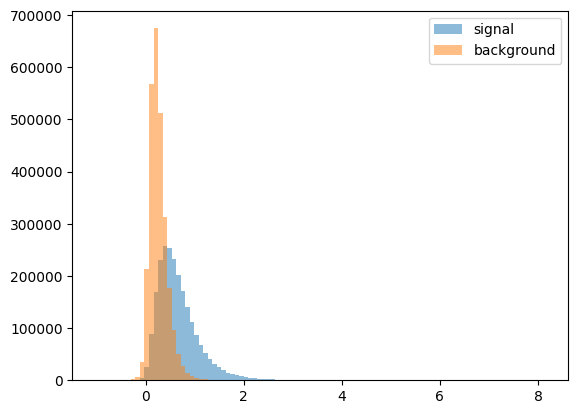

In [67]:
h_s,bins,_=plt.hist(output_s,label="signal",alpha=0.5,bins=100)
h_b,bins,_=plt.hist(output_b,bins=bins,alpha=0.5,label="background")
plt.legend()

In [68]:
df_sig_0.shape

(2287827, 18)

In [77]:
x = np.matrix(df_sig_0).transpose()

In [78]:
x.shape

(18, 2287827)

In [79]:
x_n = x*x.transpose()

In [80]:
x_n.shape

(18, 18)

In [84]:
w.shape

(18, 1)

In [85]:
w_t = w*w.transpose()

In [86]:
w_t.shape

(18, 18)

In [93]:
# Data analysis. May be off on calculations.
F_n = x_n*w_t
F_n.shape

(18, 18)

In [94]:
h_b.shape

(100,)

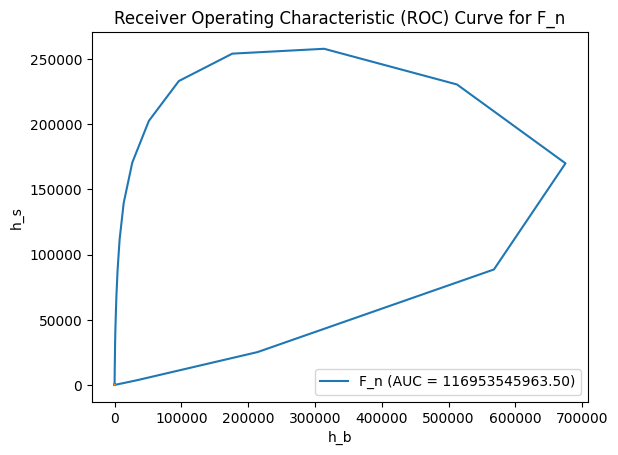

In [95]:
# ROC curve for F_n
plt.plot(h_b,h_s, label=f'F_n (AUC = {AUC(h_s, h_b):.2f})')
plt.title("Receiver Operating Characteristic (ROC) Curve for F_n")
plt.xlabel("h_b")
plt.ylabel("h_s")
plt.legend()
plt.plot([0,1],[0,1])

In [96]:
# maximal significance you can obtain from exercises in 5 is 250,000